This script will
- Get data from stations
- Get processed altimeter data
- Plot data location
- Plot time series altimeter and station
- Calculate and Plot accuracies
- Separate low level from high levels

In [1]:
from ground_data import GroundObservations
from ts_preprocesing import *#get_date_time_cols
import scipy.interpolate as sc
import geopandas as gpd
from timezonefinder import TimezoneFinder
# from ts_preprocesing import convert_units
import importlib
import pandas as pd
import os
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pytz
from pytz import timezone
import timeit
from datetime import datetime
utc=pytz.utc
utc.zone
%load_ext autoreload
%autoreload 2

In [2]:
#Test Getting data from stations
#So far what works
# Getting locss stations
# Getting ARHN stations 
# Getting USGS stations from file. Still working on R script connection
go=GroundObservations()
height_fd='height'

lc_lakes=['KHB2','HMT2','PHN2','SAW2','RAW2','BTN2','QUL2', 'WEW2', 'CFN2','YSL2','SLL2','TAB2','MAB2']
df_locss=go.read_ground_data('LOCSS', station_id=lc_lakes)
df_locss=get_date_time_cols(df_locss, 'date', has_hour=True)
stations=df_locss['gauge_id'].unique()
df_final=convert_units(df_locss,height_fd, origin='FEET', to='METER', check_col=True, unit_fd='unit',
                  gauge_fd='gauge_id')


##'2102' Is a meteorlogical station 

ar_lakes=['1805', '1819', '1824', '2830', '1830','2832', '2028','2231','2234','2300','2316']
skip_rows=1

df_arhn=go.read_ground_data('ARHN', skip_rows=skip_rows, station_id=ar_lakes)
df_arhn=get_date_time_cols(df_arhn, 'date', has_hour=True)

us_lakes=['2464800','6903880','6604000']
df_usgs=go.read_ground_data('USGS',station_id=us_lakes)
df_usgs=get_date_time_cols(df_usgs, 'date')
df_usgs=convert_units(df_usgs,height_fd, origin='FEET', to='METER', check_col=False, unit_fd='unit',
                  gauge_fd='gauge_id')
# df_usgs.height.hist()
# df_usgs.height_rw.hist()#head()
rvbr_lakes=['19069','19060','19126']
df_rvbr=go.read_ground_data('RVBR', station_id=rvbr_lakes)
df_rvbr=get_date_time_cols(df_rvbr,'date')

#falta Brazil
# df['file_name'].str.split('_', expand=True)


In [3]:
#Relevant columns
# df_ground_ts=pd.DataFrame()
common_cols=['gauge_id','source','decimal_y','height','date','year', 'month', 'day', 'hour']
df_usgs[common_cols]
df_ground_ts=pd.concat((df_usgs[common_cols].copy(),df_arhn[common_cols].copy(), df_final[common_cols].copy(), df_rvbr[common_cols].copy()), axis=0)
# pd.datetime(+pd.to_datetime(df_final['time'], format='%H:%M:%S'), format='%Y-%m-%d %H:%M:%S')
# df_ground_ts.columns

In [4]:

#Plots
#Plot deviation of the mean from satellite, groound observations and interpolated points
def plot_dev_mean(nfig,dfs, dfg, dfi, source, st_id, altis_name, date_fd, height_fd, labels, labelg, labeli, error_m_text=None, output_f=None):
    plt.figure(nfig, figsize=(20, 6))
    splot=plt.plot(dfs[date_fd], 
                   dfs[height_fd]-np.nanmean(dfs[height_fd]), '-bo', markersize=1.5, label=labels)
    gplot=plt.plot(dfg[date_fd], 
                   dfg[height_fd]-dfg[height_fd].mean(), linestyle='None',
                   markerfacecolor='#33a02c',markeredgecolor='#33a02c',marker='o', markersize=4, label=labelg)
    iplot=plt.plot(dfi[date_fd].to_numpy(), 
                   dfi[height_fd]-np.nanmean(dfi[height_fd]), linestyle='None',
                   markerfacecolor='#d95f02', markeredgecolor='#d95f02',marker='s', 
                   markersize=5, label=labeli)
    #plt.plot(altidy, altiwelev, '-ro', markersize=2.5)
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    ax=plt.gca()
    if error_m_text is not None:
        plt.text(0.01, 0.8, 'Metrics'+error_m_text, fontsize = 15, transform=ax.transAxes)
        
    plt.xlabel('Time (decimal year)', size=15, weight='bold')
    plt.ylabel('Water elev. dev from mean (m)', size=15, weight='bold')
    plt.grid('on')
    plt.legend(loc='upper right')
    plt.title('Deviation from the mean time series comparison', size=15,
              weight='bold')


    if output_f is not None:
        if not os.path.isdir(output_f):
            os.mkdir(output_f) 
        plt.savefig(output_f+source+'_'+st_id+'_vs_'+altis_name+'.png',
                bbox_inches='tight')
    
    plt.show()
    return plt

In [5]:
df_final_altis=pd.DataFrame()
df_final_ground=pd.DataFrame()
df_cm=pd.DataFrame()

In [6]:
#If everything will restart put 0, otherwise put a different number. This restars the dataframes with the output
start=1
#save plots?
save_plot=False

Station America/Argentina/Salta ncolgeoid: GEOID_01_MEDIAN 1824 ground_st: True df_altis: (73, 8)


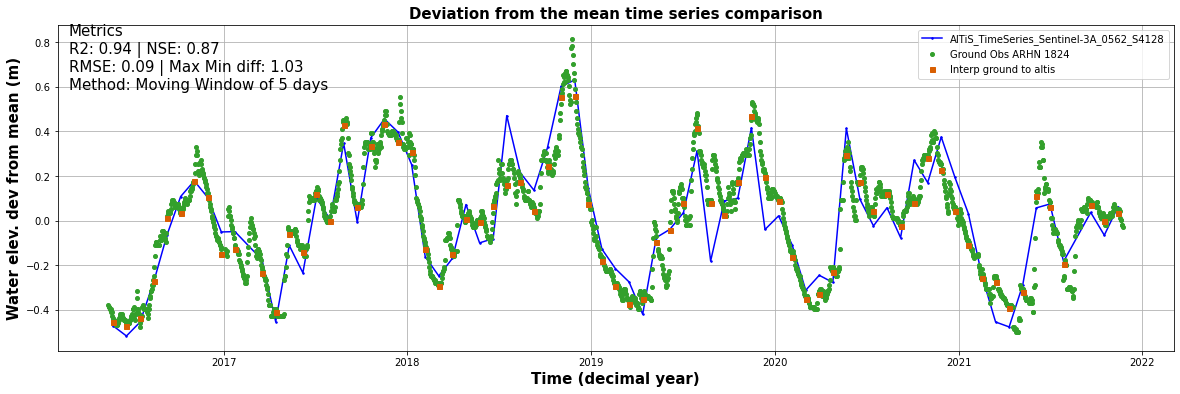

Station America/Argentina/Salta ncolgeoid: GEOID_01_MEDIAN 2028 ground_st: True df_altis: (77, 8)


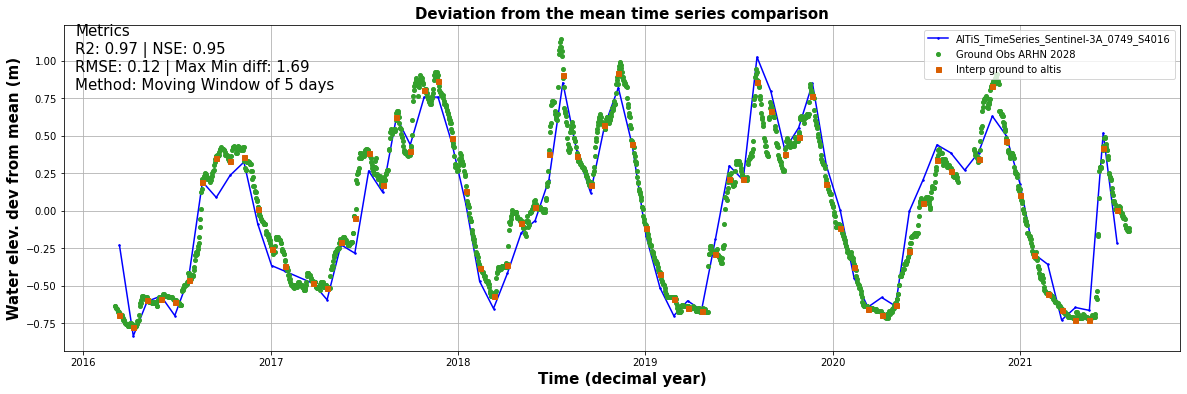

Station America/Argentina/Salta ncolgeoid: GEOID_EIGEN6C4D_MEDIAN 2028 ground_st: True df_altis: (104, 8)


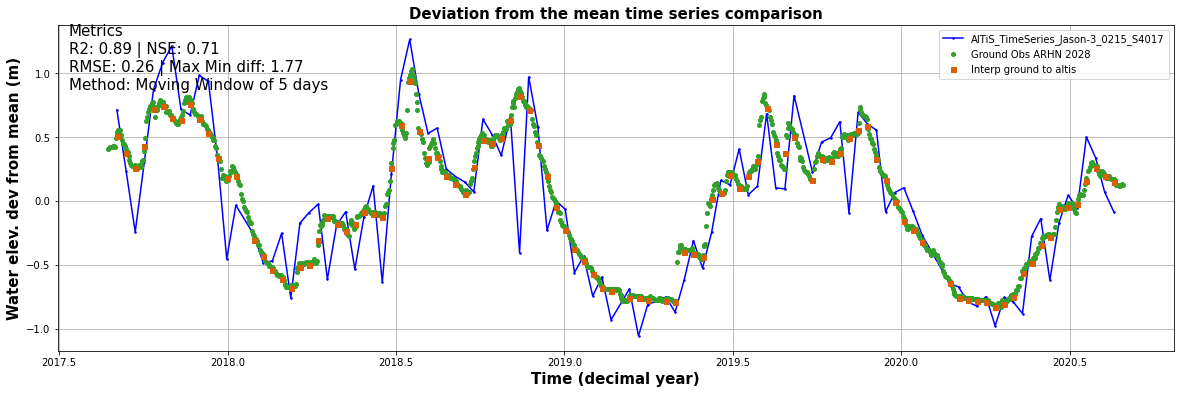

Station America/Argentina/Salta ncolgeoid: GEOID_MEDIAN 2028 ground_st: True df_altis: (157, 8)


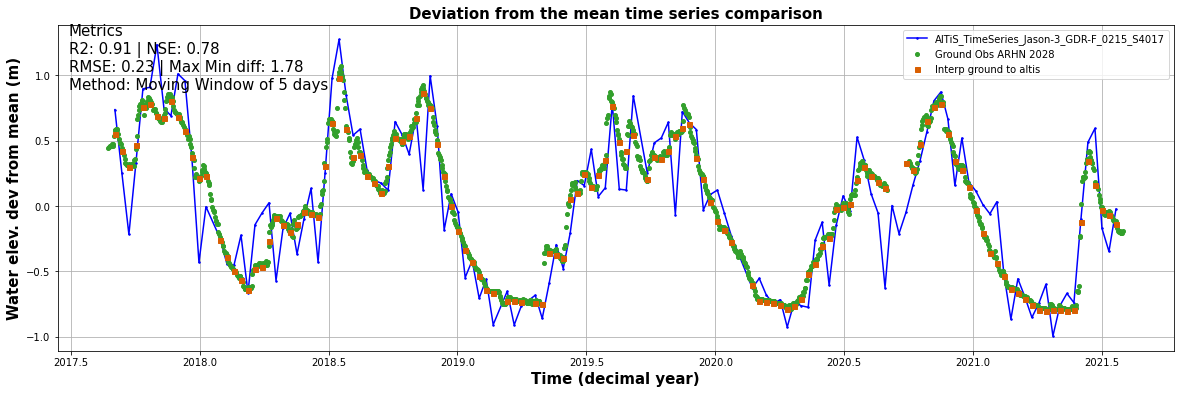

Station America/Argentina/Catamarca ncolgeoid: GEOID_01_MEDIAN 2234 ground_st: True df_altis: (76, 8)


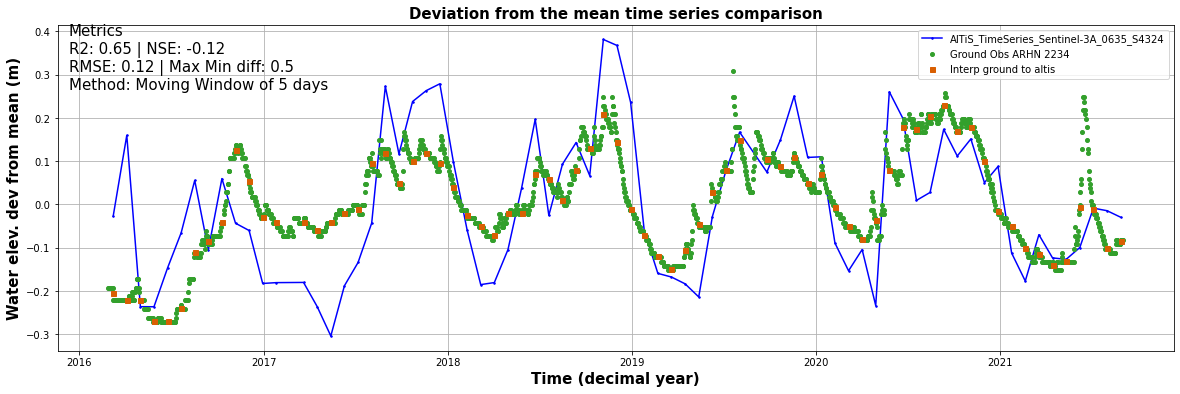

Station America/Argentina/Catamarca ncolgeoid: GEOID_01_MEDIAN 2234 ground_st: True df_altis: (75, 8)


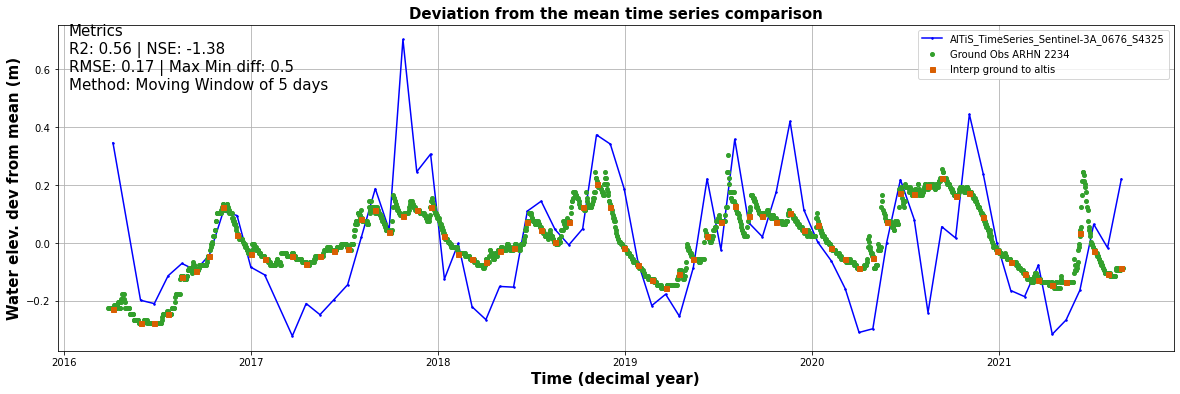

Station America/Argentina/Catamarca ncolgeoid: GEOID_01_MEDIAN 2316 ground_st: True df_altis: (41, 8)


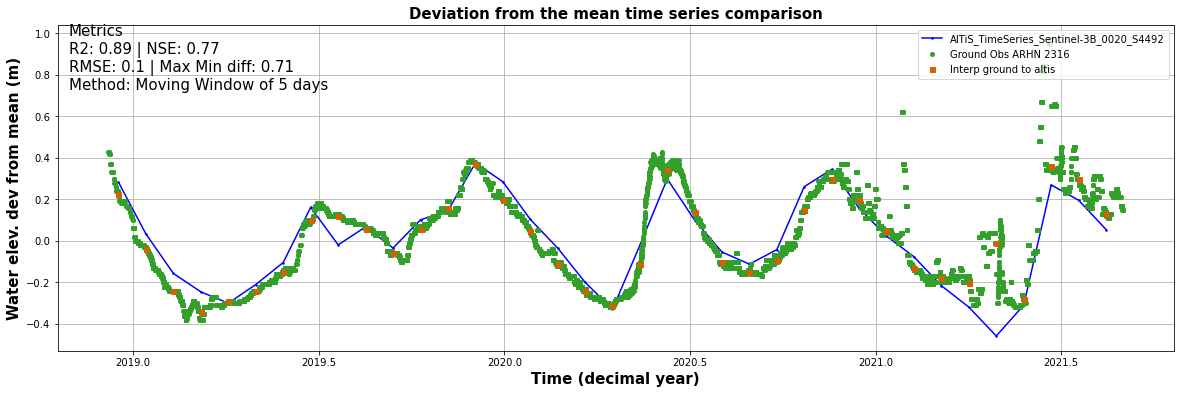

Station America/New_York ncolgeoid: GEOID_01_MEDIAN BTN2 ground_st: True df_altis: (41, 8)


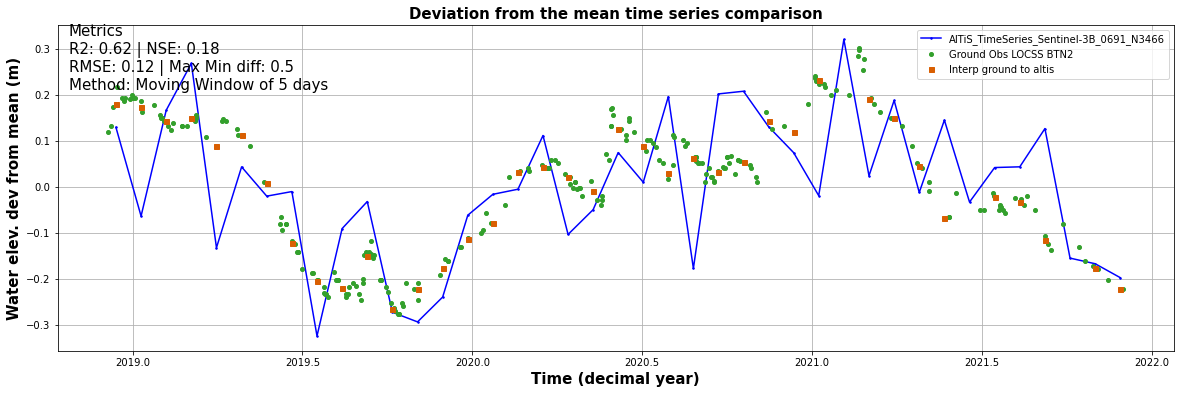

Station America/New_York ncolgeoid: GEOID_01_MEDIAN CFN2 ground_st: True df_altis: (61, 8)


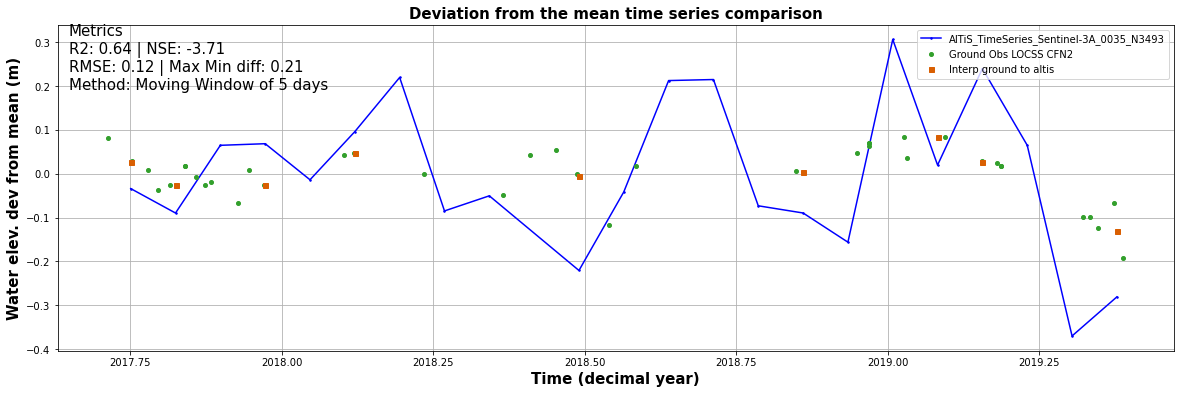

Station America/Edmonton ncolgeoid: GEOID_01_MEDIAN HMT2 ground_st: True df_altis: (73, 8)


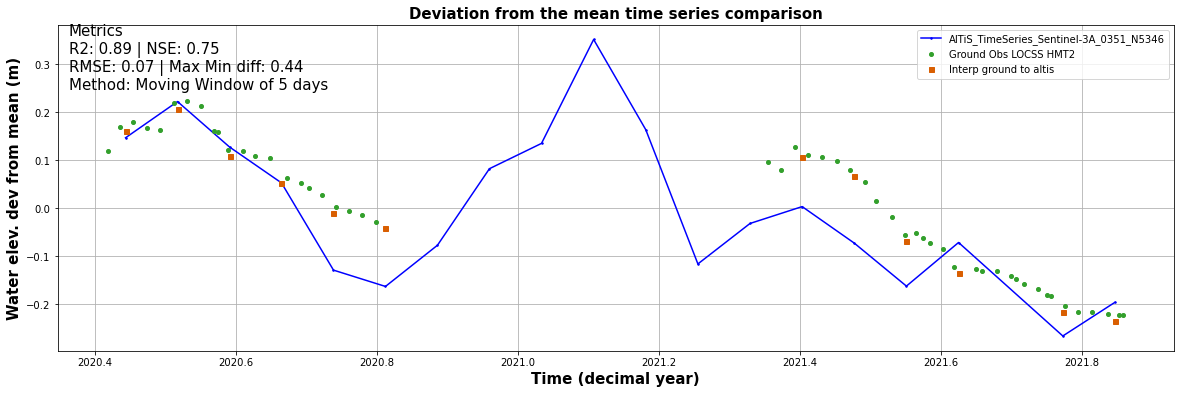

Station Asia/Dhaka ncolgeoid: GEOID_01_MEDIAN KHB2 ground_st: True df_altis: (67, 8)


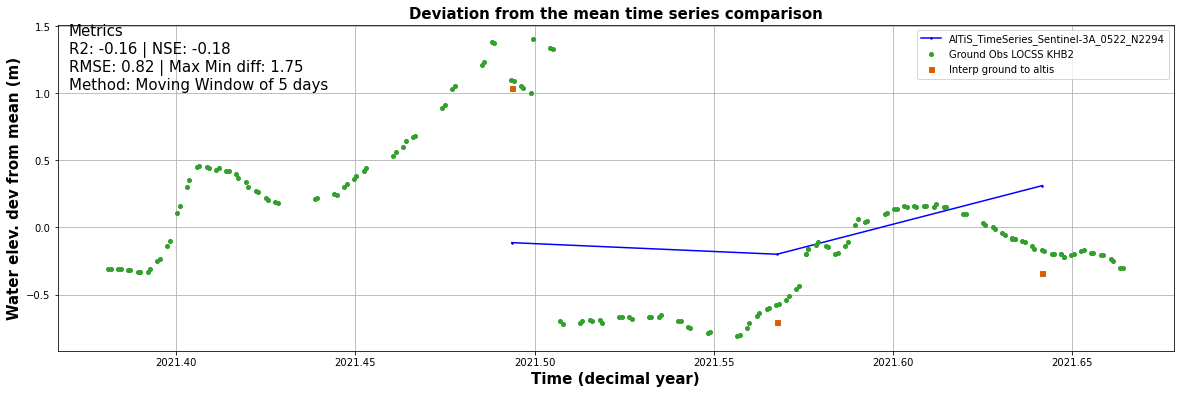

Station America/New_York ncolgeoid: GEOID_01_MEDIAN PHN2 ground_st: True df_altis: (78, 8)


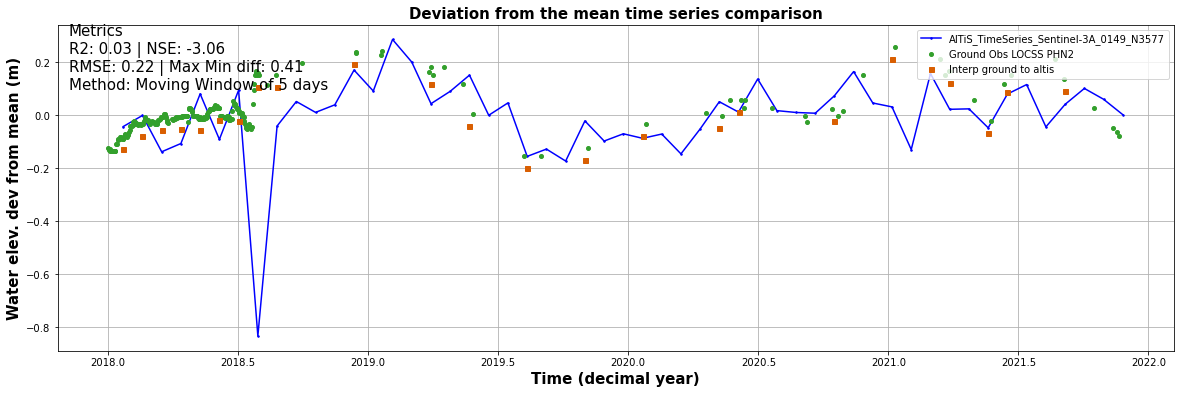

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN QUL2 ground_st: True df_altis: (13, 8)


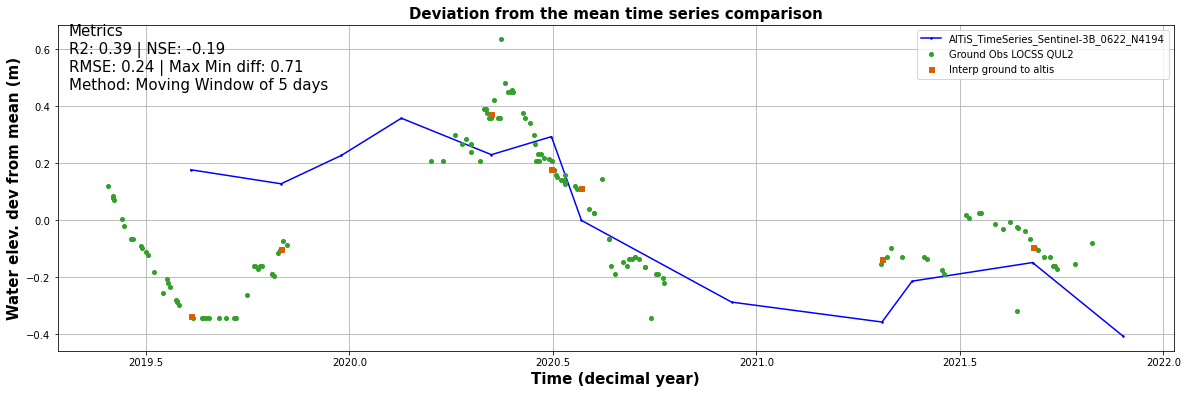

Station America/Los_Angeles ncolgeoid: GEOID_01_MEDIAN RAW2 ground_st: True df_altis: (22, 8)


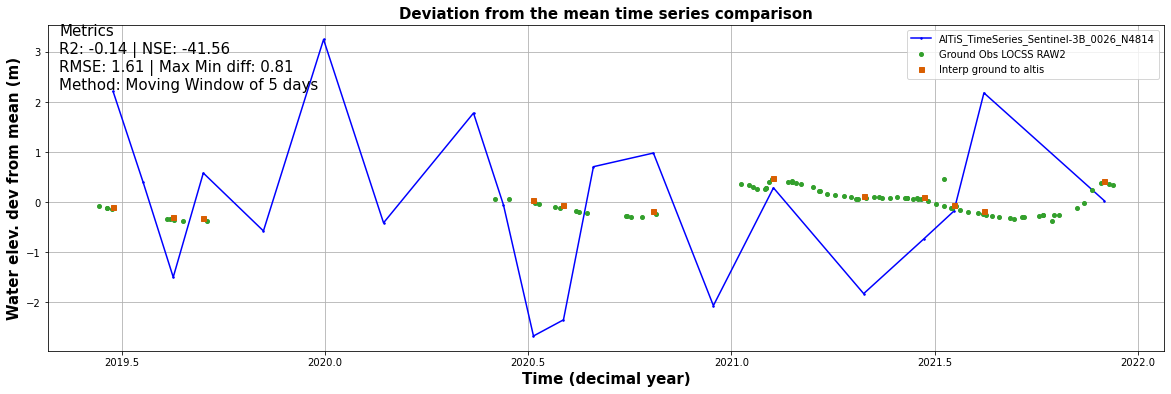

Station America/Los_Angeles ncolgeoid: GEOID_01_MEDIAN SAW2 ground_st: True df_altis: (75, 8)


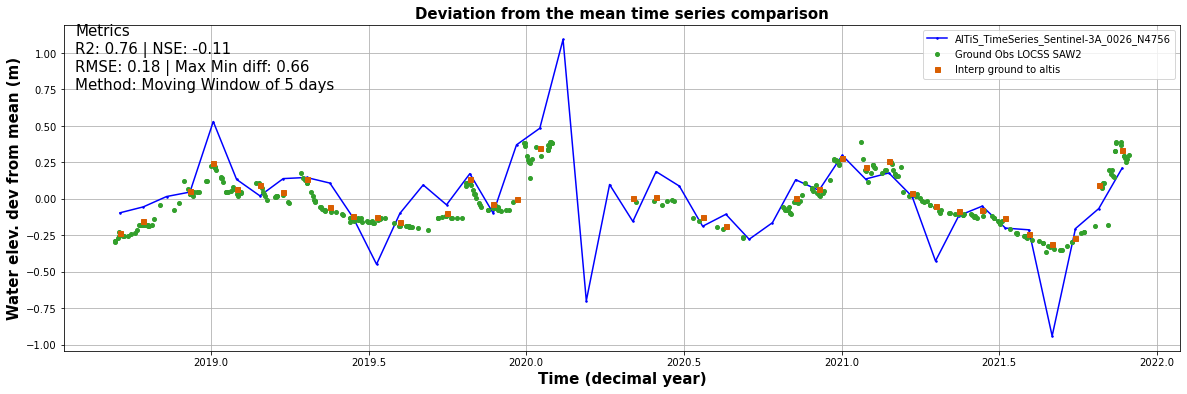

Station Antarctica/McMurdo ncolgeoid: GEOID_01_MEDIAN SLL2 ground_st: True df_altis: (34, 8)


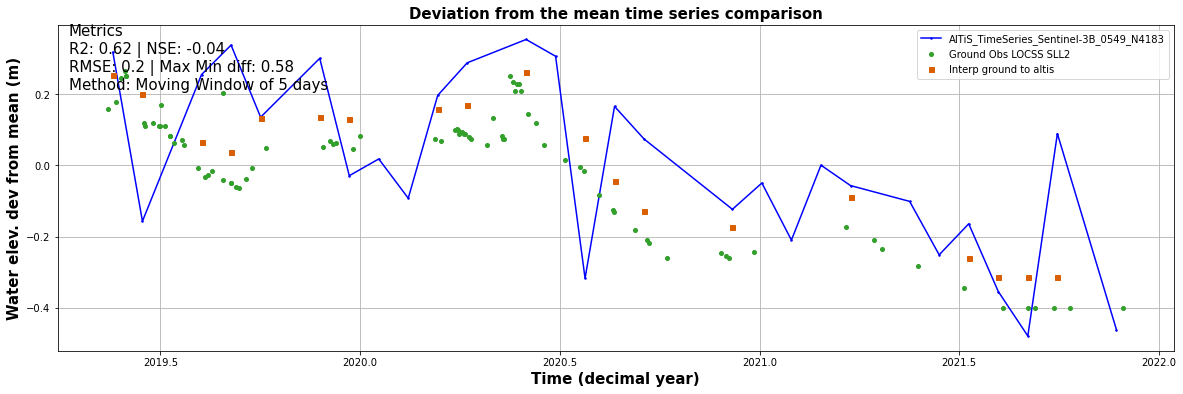

Station America/Los_Angeles ncolgeoid: GEOID_01_MEDIAN WEW2 ground_st: True df_altis: (76, 8)


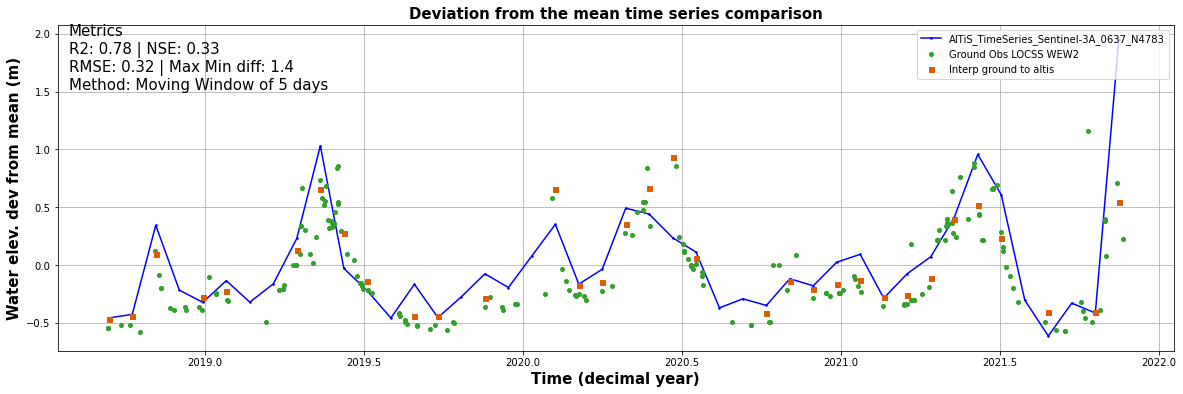

Station Antarctica/McMurdo ncolgeoid: GEOID_01_MEDIAN YSL2 ground_st: True df_altis: (26, 8)


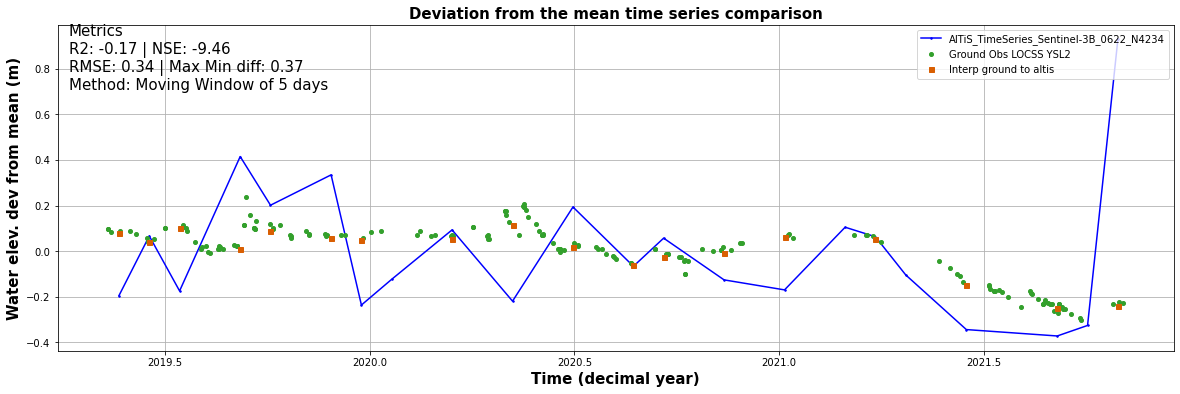

Station Asia/Dhaka ncolgeoid: GEOID_01_MEDIAN TAB2 ground_st: True df_altis: (76, 8)


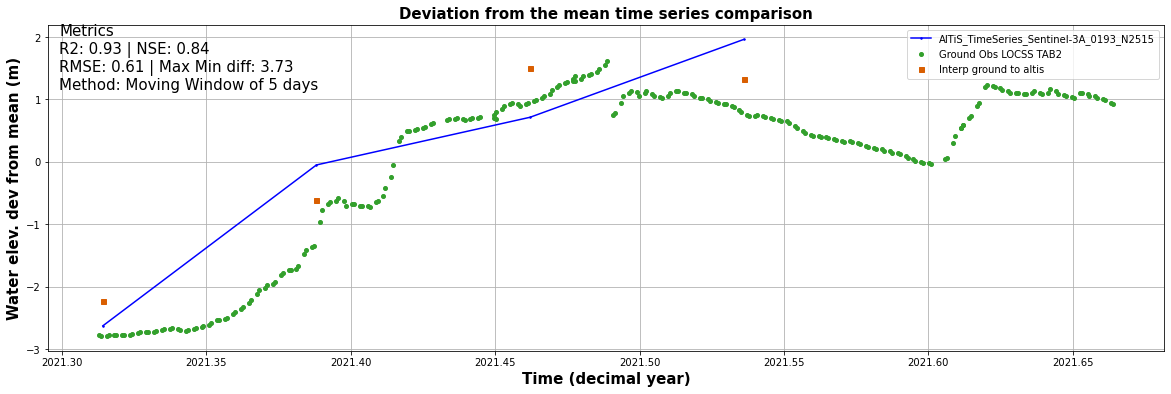

Station Asia/Dhaka ncolgeoid: GEOID_01_MEDIAN MAB2 ground_st: True df_altis: (76, 8)


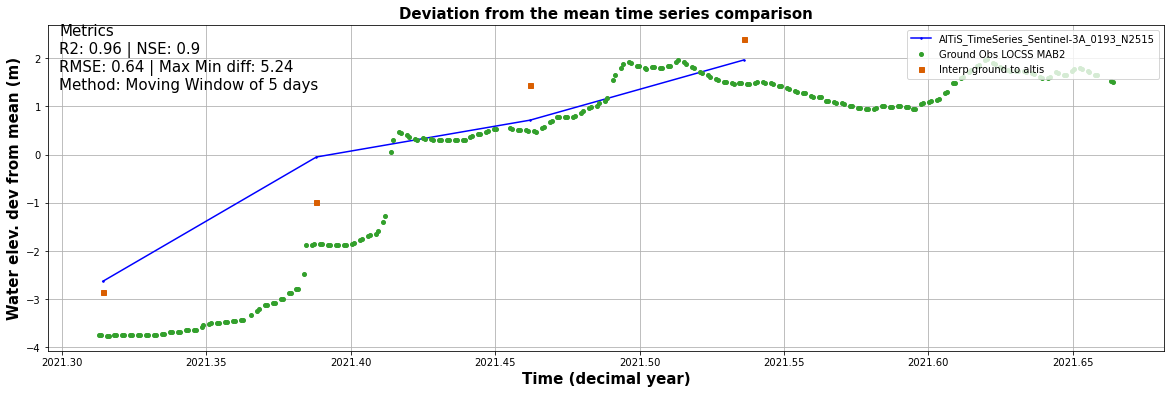

Station America/Sao_Paulo ncolgeoid: GEOID_01_MEDIAN 19060 ground_st: True df_altis: (52, 8)


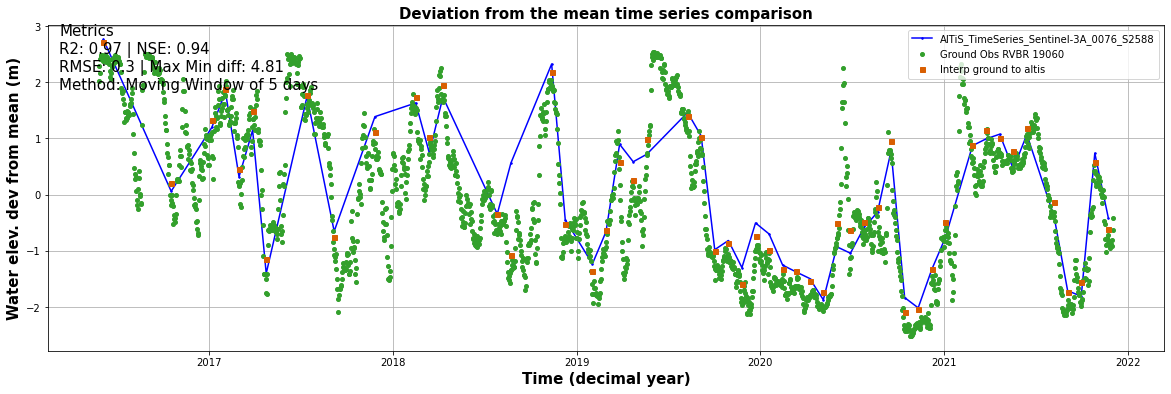

Station America/Sao_Paulo ncolgeoid: GEOID_EIGEN6C4D_MEDIAN 19060 ground_st: True df_altis: (106, 8)


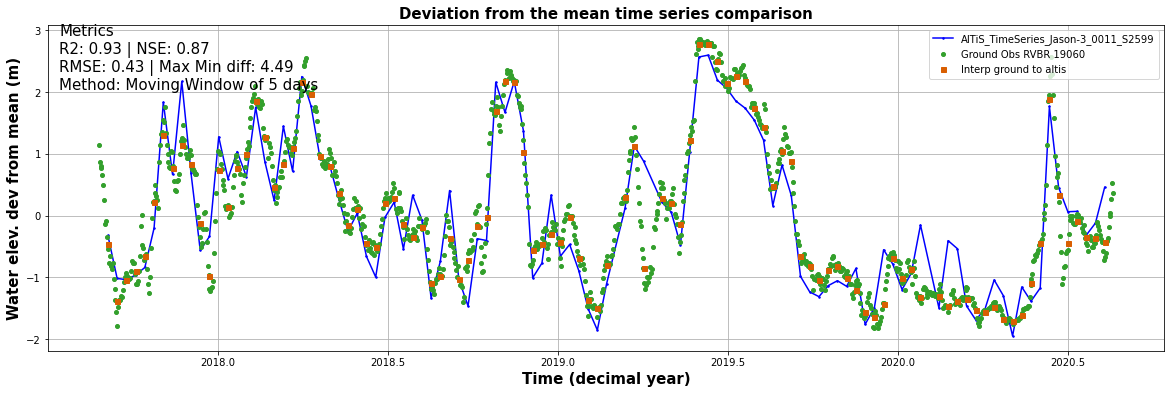

Station America/Maceio ncolgeoid: GEOID_01_MEDIAN 19126 ground_st: True df_altis: (37, 8)


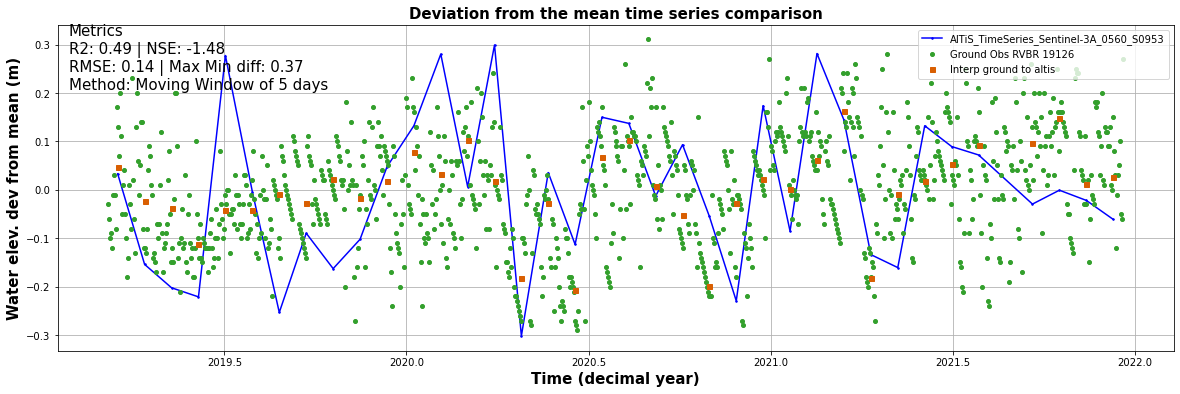

Error: no column geoid_01_median in ../data/alti_timeseries/AlTiS_TimeSeries_Sentinel-3A_0190_S2751.csv
Station America/Sao_Paulo ncolgeoid: GEOID_01_MEDIAN 19069 ground_st: True df_altis: (56, 8)


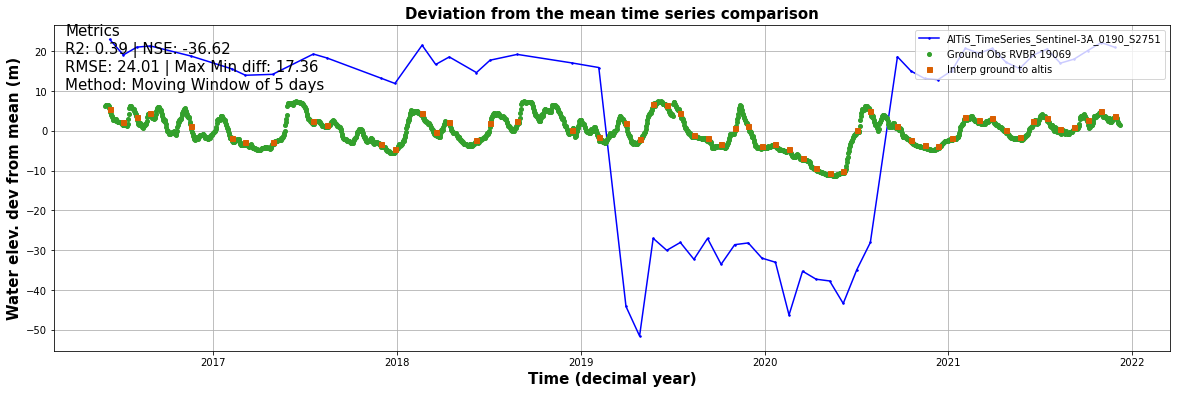

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN 2464800 ground_st: True df_altis: (78, 8)


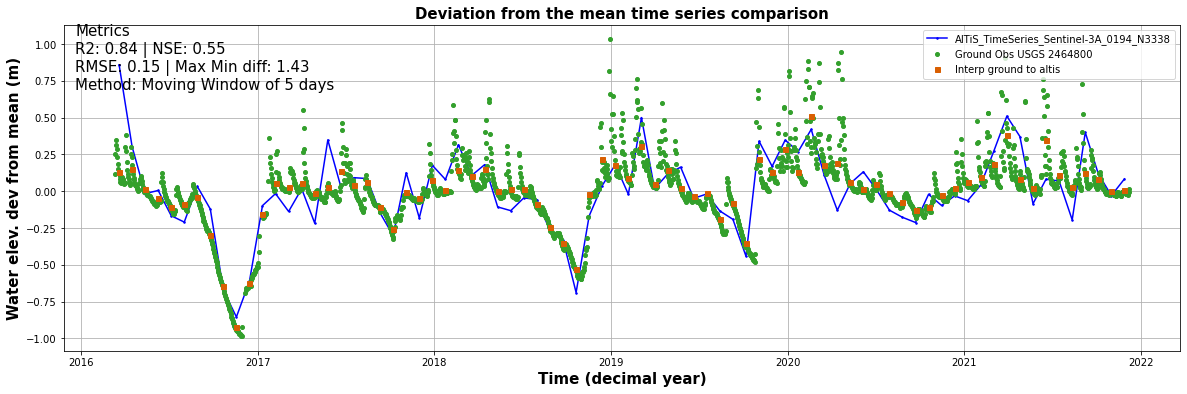

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN 6604000 ground_st: True df_altis: (41, 8)


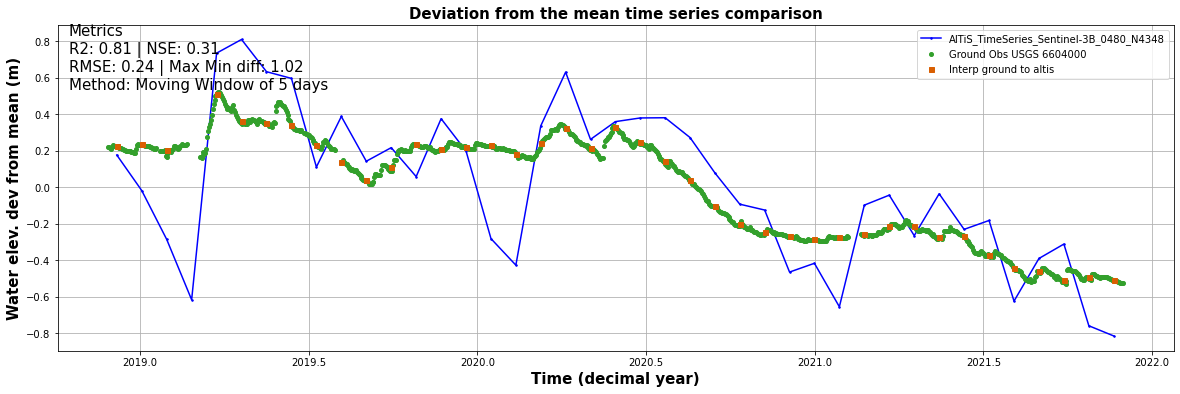

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN 6903880 ground_st: True df_altis: (77, 8)


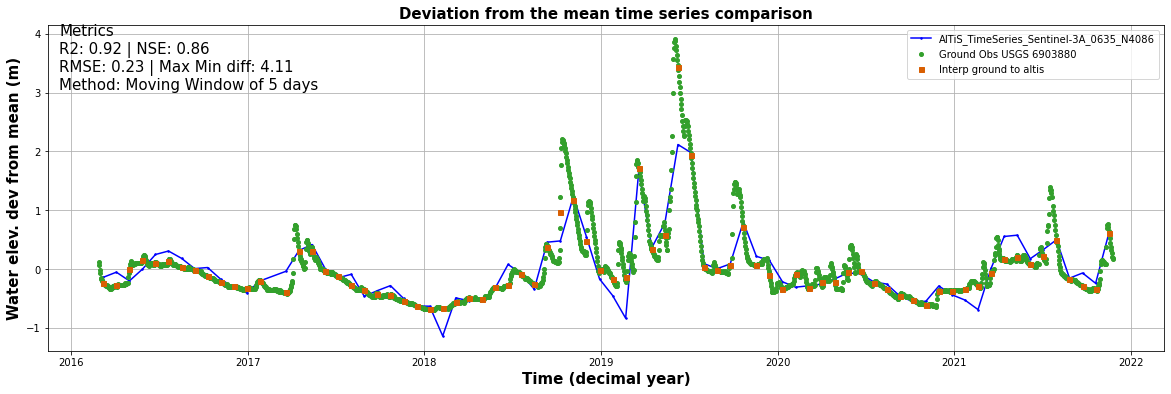

In [7]:
# Accuracies with moving window

#Read each file and convert it to dataframe
g_path='../data/alti_timeseries/'
time_fig=datetime.now().strftime("%Y%m%d_%H_%M")
path_name='../data/results/plots_mv_'+time_fig+'/'

if save_plot:
    output_f=path_name
else:
    output_f=None

if start==0:
    df_final_altis=pd.DataFrame()
    df_final_ground=pd.DataFrame()
    df_cm=pd.DataFrame()

path= '../data/alti_timeseries/lonlat_vs_altis_ed.csv'
lon_fd='lon'
lat_fd='lat'

altis_csv=pd.read_csv(path)
#Add the time_zone to each coordinate 
tf=TimezoneFinder()
altis_csv['tz']=altis_csv.apply(lambda x:tf.timezone_at(lng=x[lon_fd],lat=x[lat_fd]), axis=1)
#filter only altis time series with ground observations
altis_w_gts_csv=altis_csv.loc[altis_csv['station_id'].notna()]


df_gts=df_ground_ts

st_fd='gauge_id'
st_date_fd='date'
altis_date_fd = 'date'  # Same value for Sentinel-3A/B
altis_height_fd = 'ice1_ku_SurfHeight_alti_median'  # Same value for Sentinel-3A/B
nodataalti=-9999

wse_ref='e'

i=1


for index,row in altis_w_gts_csv.iterrows():
    # print(row['station_id'])
    altis_name=row['altivs_nam']
    st_id=row['station_id']
    ncolgeoid=row['ncolgeoid']
    # Call every altis relative to the ellipsoide
    
    # is_Sentinel=altis_name.find('Sentinel-3')
    # if is_Sentinel!=-1:
    if ncolgeoid!='No':
        #Call the function with geoid field and wse_type='e'
        df_altis, df_ground_st=open_match_station_altis(g_path,altis_name, st_fd, df_gts, st_id,altis_date_fd, altis_height_fd,
                                                        nodataalti,ncolgeoid=ncolgeoid,wse_ref=wse_ref)
    else:
        #Call the function with geoid field and wse_type='g'
        df_altis, df_ground_st=open_match_station_altis(g_path,altis_name, st_fd, df_gts, st_id,altis_date_fd, altis_height_fd, nodataalti)
    
    print('Station '+row['tz']+' ncolgeoid: '+str(ncolgeoid).upper(), st_id+' ground_st: '+str(not df_ground_st.empty)+' df_altis: '+str(df_altis.shape))
    # print(df_altis.columns)
    if not df_ground_st.empty:
        # print('df_altis\n', df_altis.head(3))
        # print('df_ground_st '+st_id+'\n', df_ground_st.head(3))
        df_altis['ground_st_1']=st_id
        #Convert time in df_gts_st to UTC
        source=df_ground_st['source'].iloc[0]

        df_ground_st['date_utc']=[timezone(row['tz']).localize(date).astimezone(utc.zone) for date in df_ground_st[st_date_fd]]
        
        #print('\nBefore: '+st_id+'\n', df_ground_st[[st_date_fd,'date_utc','decimal_y']].head())
        df_ground_st['altis_d_1']=altis_name


        (df_altis_c, df_ground_c)=get_common_period(df_ts1=df_altis, df_ts2=df_ground_st, 
                                                    date_ts1_fd=altis_date_fd, date_ts2_fd='date_utc', delta_days=True, ndays=10)
        
        if source=='USGS':
            df_ground_c=get_date_time_cols(df_ground_c, 'date_utc', has_hour=False)
        else:
            df_ground_c=get_date_time_cols(df_ground_c, 'date_utc', has_hour=True)
        #print('\nAfter: '+st_id+'\n', df_ground_st[[st_date_fd,'date_utc','decimal_y']].head())
        df_ground_c=df_ground_c.sort_values(by=['decimal_y'])
        df_altis_c=df_altis_c.sort_values(by=['decimal_y'])
        # print(df_altis_c.head())
        delta=5
        median_fd='median_d_'+str(delta)
        mean_fd='mean_d_'+str(delta)
        std_fd='std_d_'+str(delta)
        count_fd='count_d_'+str(delta)

        df_altis_c[[median_fd,mean_fd, std_fd,count_fd]]=df_altis_c.apply(lambda x: moving_window_around_date(df_ground_c,
                                                                                                              x[altis_date_fd],
                                                                                                              delta,
                                                                                                              'height',
                                                                                                              'date_utc'), axis=1).apply(pd.Series)

        corr_alti_insi, ns_alti_insi, rmse_alti_insi, ampl_insi=get_comp_metrics(ts_obs=df_altis_c['height'].to_numpy(),ts_est=df_altis_c[median_fd].to_numpy())
        
        #Create a output dataframe with the metrics
        cm_dict={'station':[st_id], 'altis':[altis_name], 'source':[source], 'method':['Moving Window'],
                'r2':[corr_alti_insi],'NSF':[ns_alti_insi],'RMSE':[rmse_alti_insi],'APL':[ampl_insi]}
        df_cmi=pd.DataFrame(cm_dict)
        
        df_cm=pd.concat((df_cm,df_cmi), axis=0)
        df_final_altis=pd.concat((df_final_altis,df_altis_c), axis=0)
        df_final_ground=pd.concat((df_final_ground,df_ground_c), axis=0)
        
        error_m_text='\nR2: '+str(np.round(corr_alti_insi, decimals=2))+' | '+\
        'NSE: '+str(np.round(ns_alti_insi,decimals=2))+'\n'+\
        'RMSE: '+str(np.round(rmse_alti_insi,decimals=2))+' | '+\
        'Max Min diff: '+str(np.round(ampl_insi,decimals=2))+'\n'+\
        'Method: Moving Window of '+str(delta)+' days'

        labels=altis_name
        labelg='Ground Obs '+source+' '+st_id
        labeli='Interp ground to altis'

        

        dfs=df_altis_c
        dfg=df_ground_c
        # dic_intp={'decimal_y':df_altis_plot['decimal_y'].to_numpy(), 'height':inh_2_altidy}

        dfi=df_altis_c[['decimal_y',median_fd]].copy()#pd.DataFrame(dic_intp)
        dfi=dfi.rename(columns={median_fd:'height'})
        date_plot_fd='decimal_y'
        height_plot_fd='height'
        nfig=i
        
        p=plot_dev_mean(nfig,dfs, dfg, dfi, source, st_id, altis_name, date_plot_fd, height_plot_fd, labels, labelg, labeli, error_m_text, output_f)
        p.show()
        p.close()
    
        
        i=i+1
        
        
df_final_altis['method']='Moving Window'
df_final_ground['method']='Moving Window'
    


Station America/Argentina/Salta ncolgeoid: GEOID_01_MEDIAN 1824 ground_st: True df_altis: (73, 8) df_ground_st: (8037, 9)
dimension ground altis (1998, 11) (73, 9)


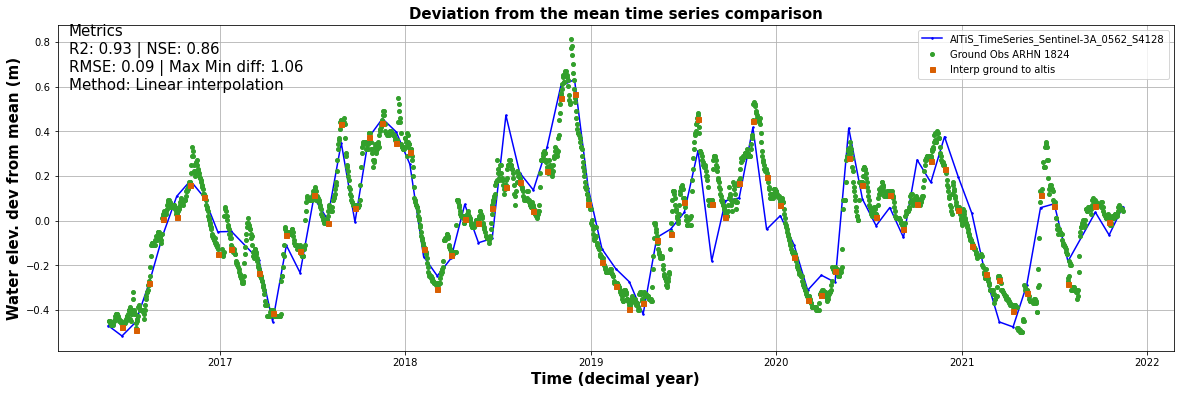

Station America/Argentina/Salta ncolgeoid: GEOID_01_MEDIAN 2028 ground_st: True df_altis: (77, 8) df_ground_st: (31001, 9)
dimension ground altis (1925, 11) (72, 9)


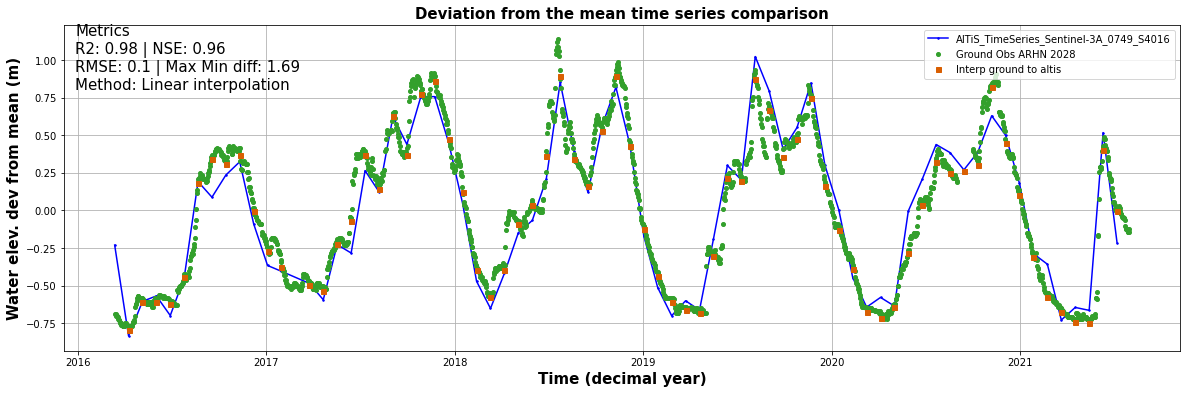

Station America/Argentina/Salta ncolgeoid: GEOID_EIGEN6C4D_MEDIAN 2028 ground_st: True df_altis: (104, 8) df_ground_st: (31001, 9)
dimension ground altis (1082, 11) (104, 9)


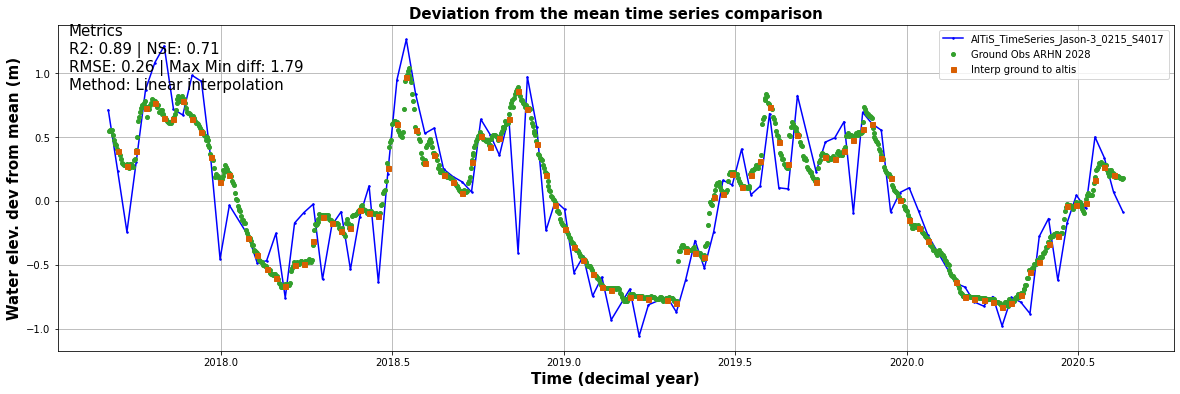

Station America/Argentina/Salta ncolgeoid: GEOID_MEDIAN 2028 ground_st: True df_altis: (157, 8) df_ground_st: (31001, 9)
dimension ground altis (1399, 11) (138, 9)


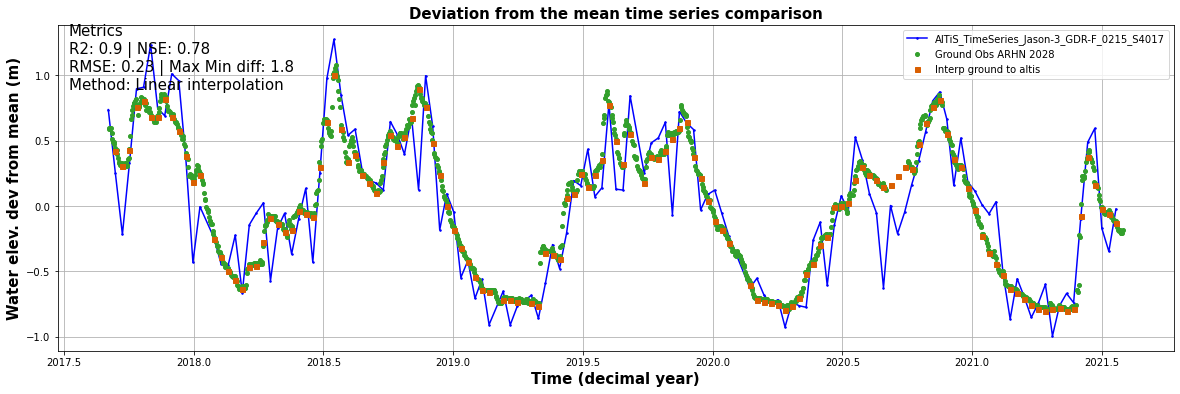

Station America/Argentina/Catamarca ncolgeoid: GEOID_01_MEDIAN 2234 ground_st: True df_altis: (76, 8) df_ground_st: (26584, 9)
dimension ground altis (2003, 11) (73, 9)


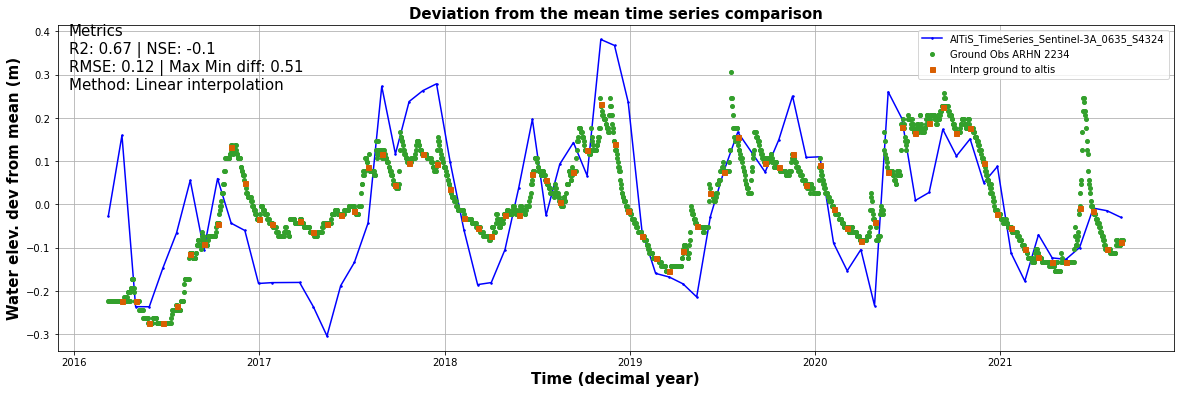

Station America/Argentina/Catamarca ncolgeoid: GEOID_01_MEDIAN 2234 ground_st: True df_altis: (75, 8) df_ground_st: (26584, 9)
dimension ground altis (1974, 11) (72, 9)


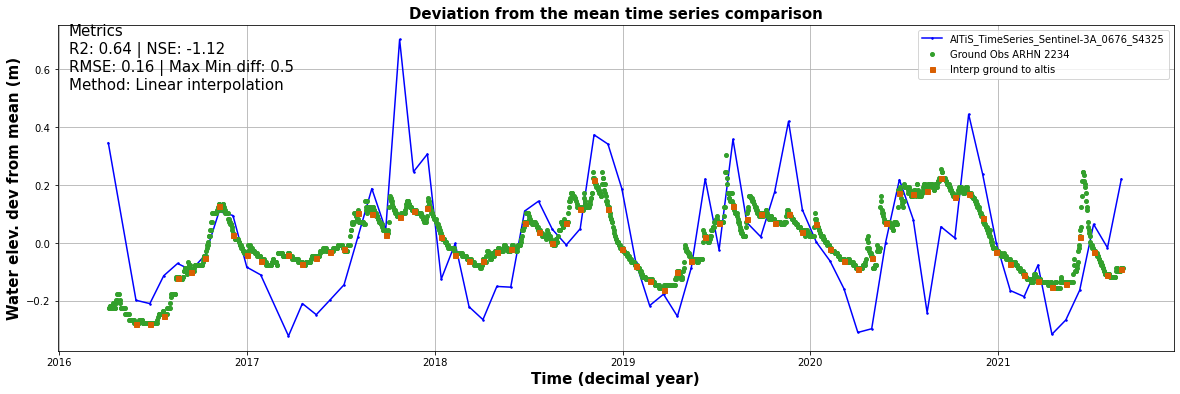

Station America/Argentina/Catamarca ncolgeoid: GEOID_01_MEDIAN 2316 ground_st: True df_altis: (41, 8) df_ground_st: (38985, 9)
dimension ground altis (22085, 11) (37, 9)


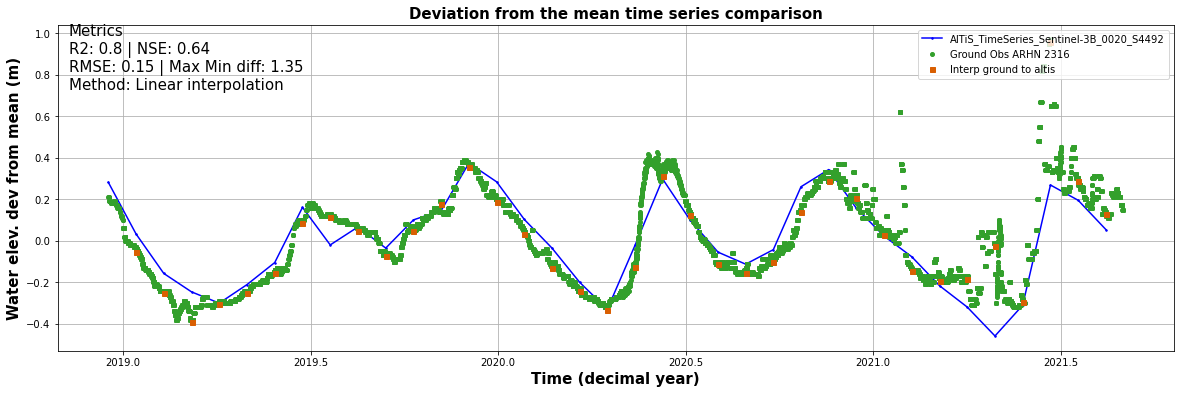

Station America/New_York ncolgeoid: GEOID_01_MEDIAN BTN2 ground_st: True df_altis: (41, 8) df_ground_st: (536, 9)
dimension ground altis (246, 11) (41, 9)


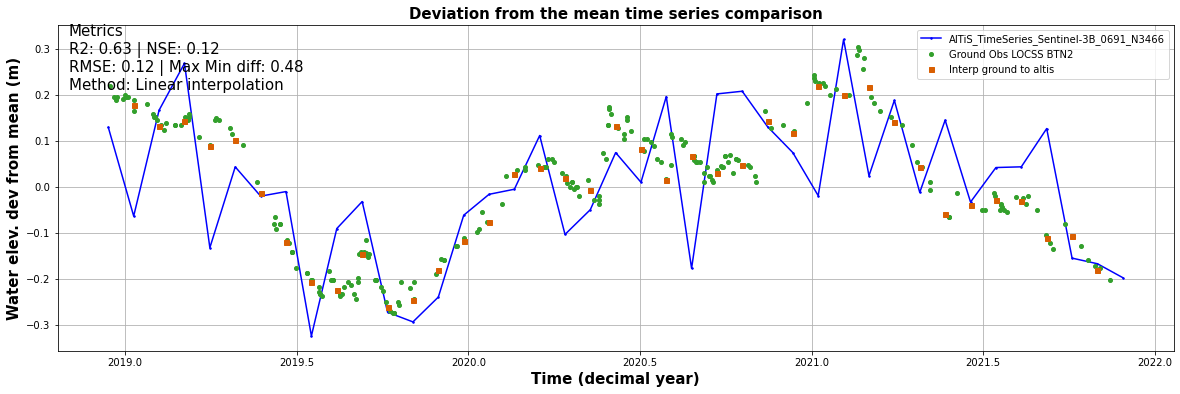

Station America/New_York ncolgeoid: GEOID_01_MEDIAN CFN2 ground_st: True df_altis: (61, 8) df_ground_st: (42, 9)
dimension ground altis (42, 11) (22, 9)


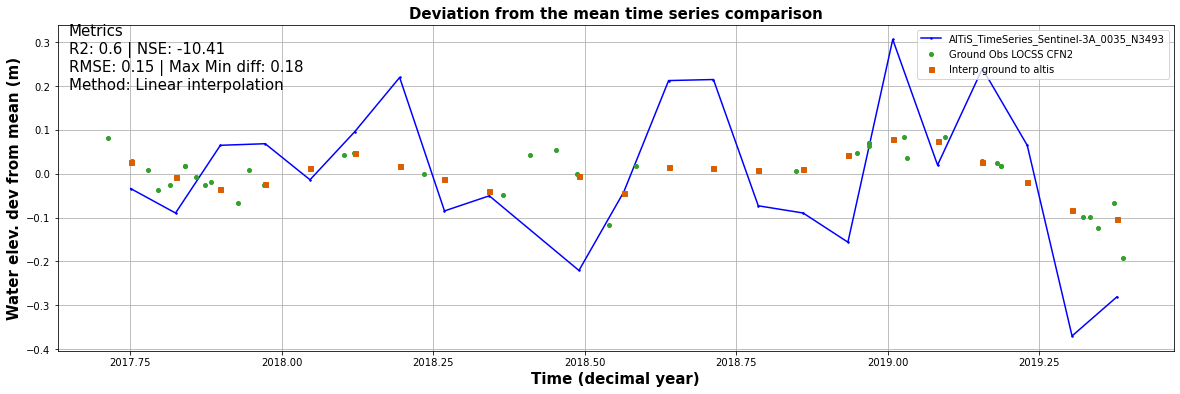

Station America/Edmonton ncolgeoid: GEOID_01_MEDIAN HMT2 ground_st: True df_altis: (73, 8) df_ground_st: (53, 9)
dimension ground altis (53, 11) (19, 9)


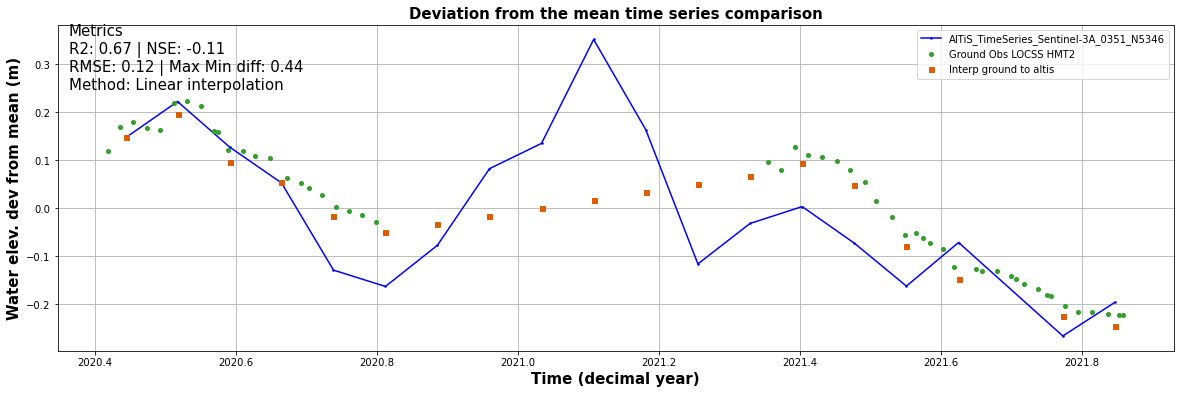

Station Asia/Dhaka ncolgeoid: GEOID_01_MEDIAN KHB2 ground_st: True df_altis: (67, 8) df_ground_st: (170, 9)
dimension ground altis (170, 11) (3, 9)


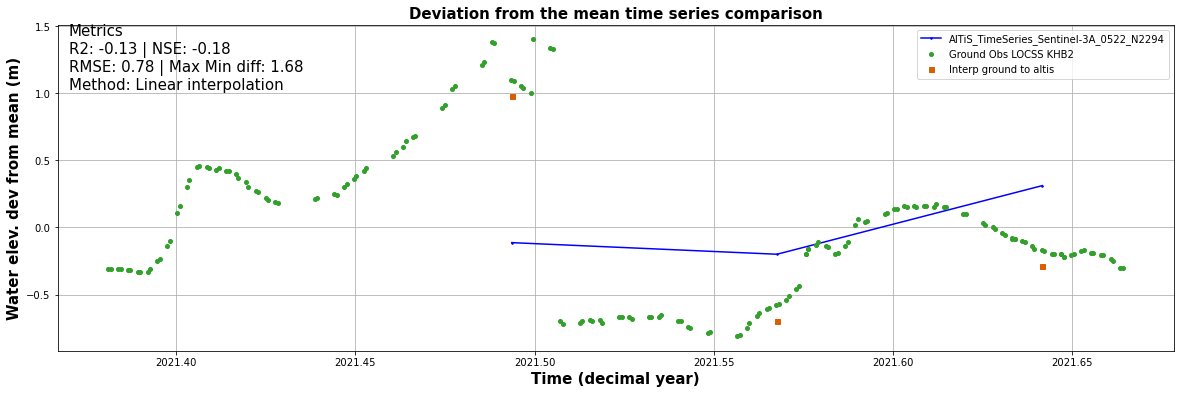

Station America/New_York ncolgeoid: GEOID_01_MEDIAN PHN2 ground_st: True df_altis: (78, 8) df_ground_st: (257, 9)
dimension ground altis (252, 11) (53, 9)


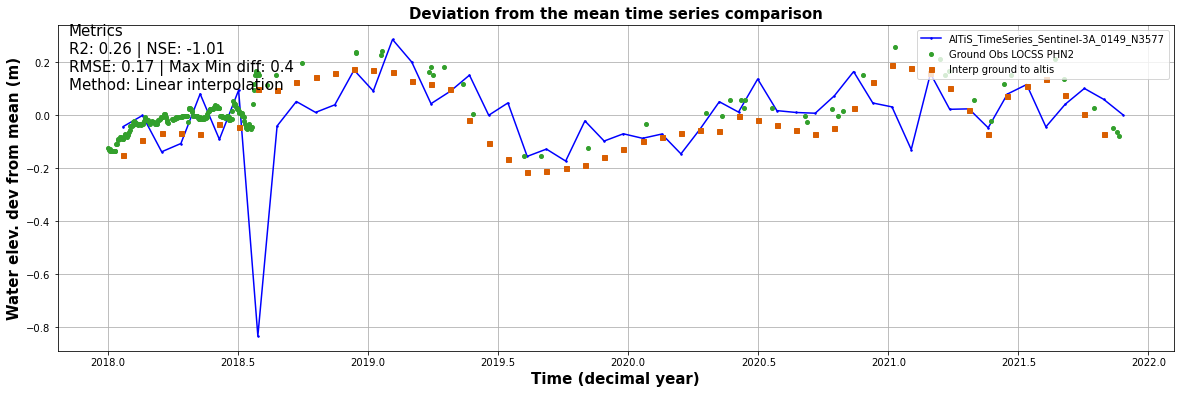

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN QUL2 ground_st: True df_altis: (13, 8) df_ground_st: (145, 9)
dimension ground altis (143, 11) (12, 9)


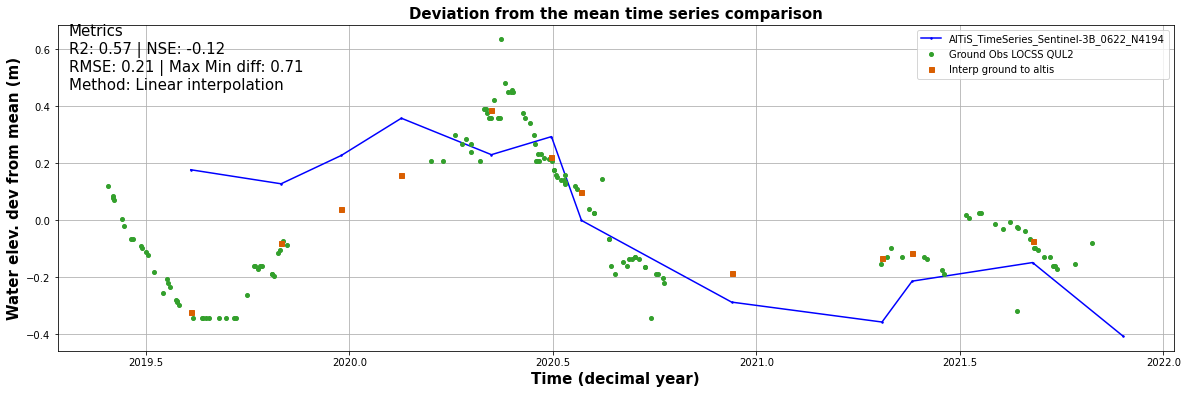

Station America/Los_Angeles ncolgeoid: GEOID_01_MEDIAN RAW2 ground_st: True df_altis: (22, 8) df_ground_st: (113, 9)
dimension ground altis (90, 11) (20, 9)


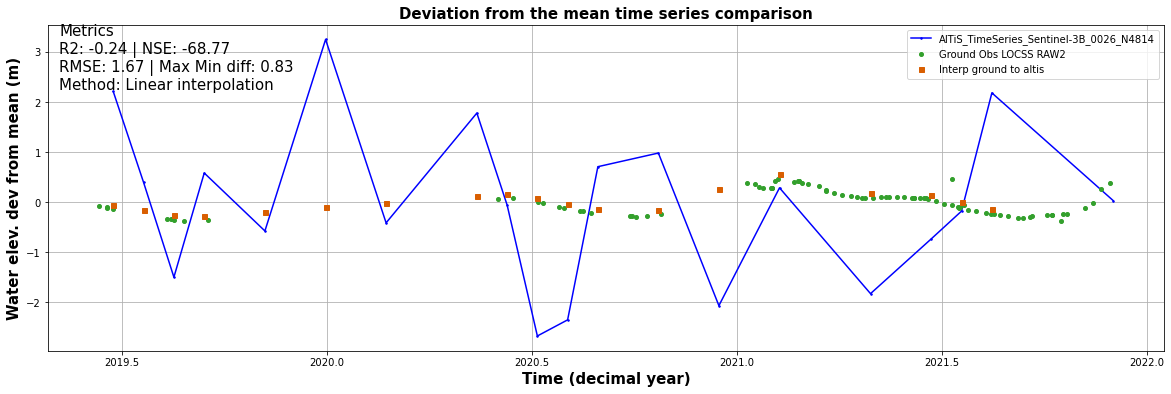

Station America/Los_Angeles ncolgeoid: GEOID_01_MEDIAN SAW2 ground_st: True df_altis: (75, 8) df_ground_st: (397, 9)
dimension ground altis (348, 11) (44, 9)


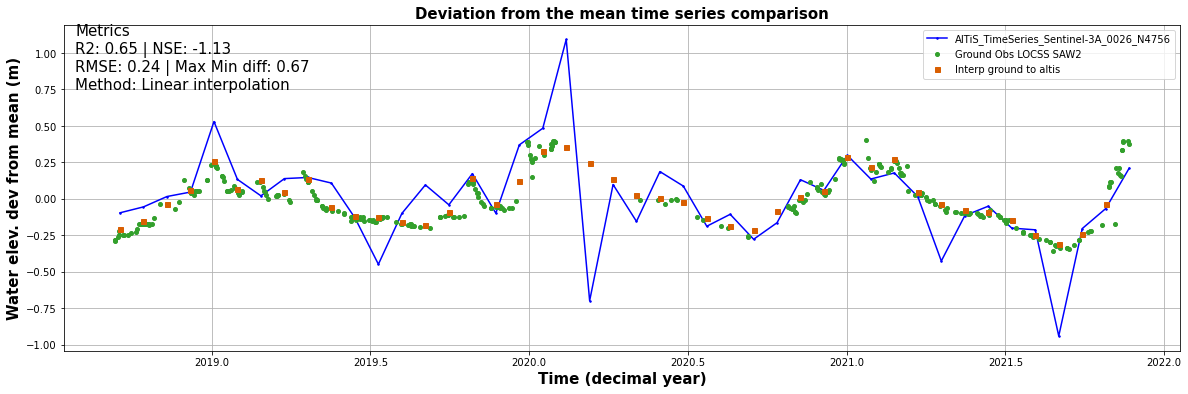

Station Antarctica/McMurdo ncolgeoid: GEOID_01_MEDIAN SLL2 ground_st: True df_altis: (34, 8) df_ground_st: (88, 9)
dimension ground altis (86, 11) (28, 9)


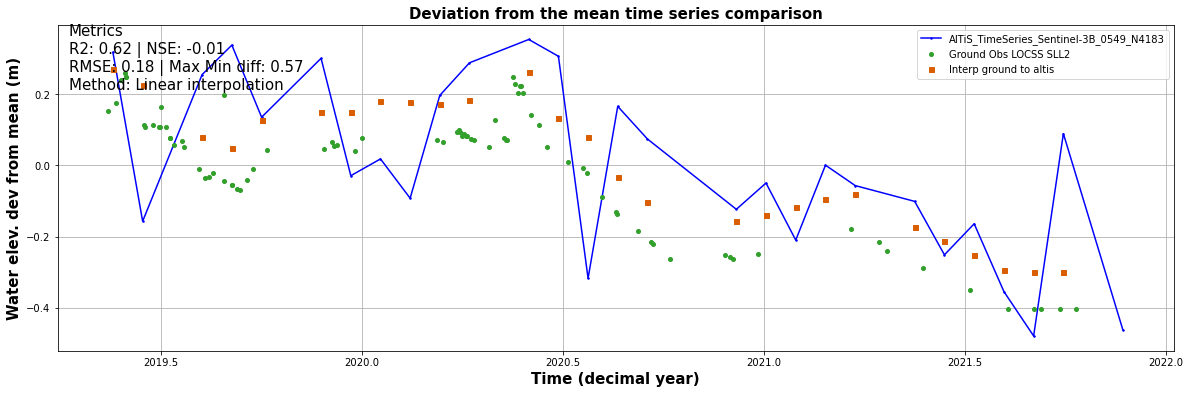

Station America/Los_Angeles ncolgeoid: GEOID_01_MEDIAN WEW2 ground_st: True df_altis: (76, 8) df_ground_st: (213, 9)
dimension ground altis (201, 11) (44, 9)


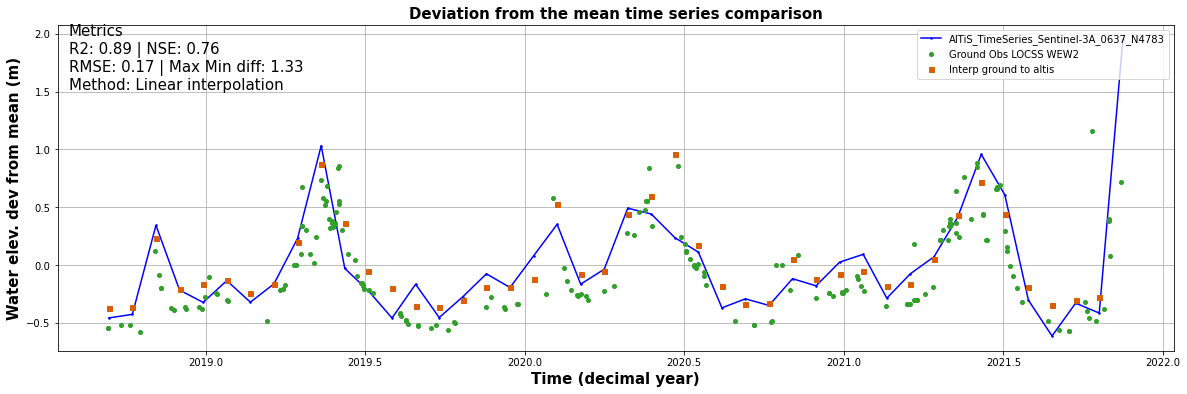

Station Antarctica/McMurdo ncolgeoid: GEOID_01_MEDIAN YSL2 ground_st: True df_altis: (26, 8) df_ground_st: (185, 9)
dimension ground altis (175, 11) (22, 9)


Station Asia/Dhaka ncolgeoid: GEOID_01_MEDIAN TAB2 ground_st: True df_altis: (76, 8) df_ground_st: (258, 9)
dimension ground altis (258, 11) (4, 9)


Station Asia/Dhaka ncolgeoid: GEOID_01_MEDIAN MAB2 ground_st: True df_altis: (76, 8) df_ground_st: (253, 9)
dimension ground altis (253, 11) (4, 9)


Station America/Sao_Paulo ncolgeoid: GEOID_01_MEDIAN 19060 ground_st: True df_altis: (52, 8) df_ground_st: (8132, 9)
dimension ground altis (1998, 11) (52, 9)


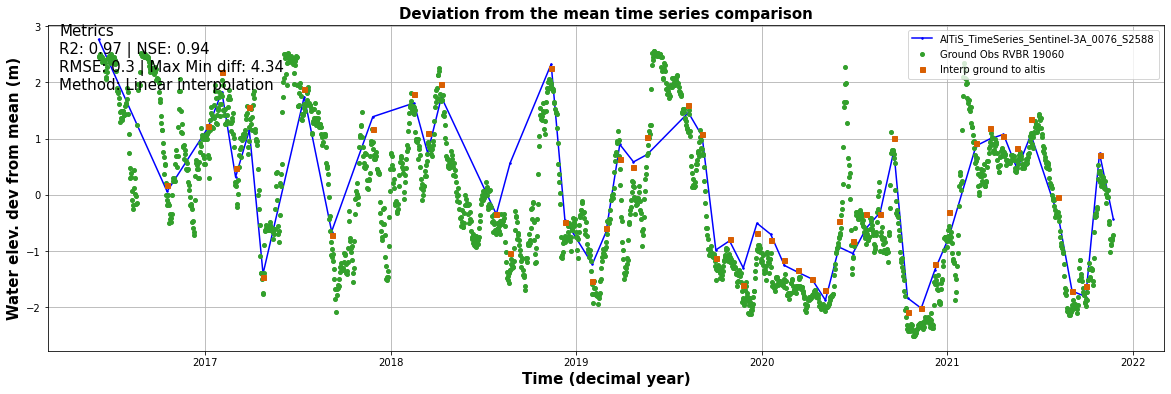

Station America/Sao_Paulo ncolgeoid: GEOID_EIGEN6C4D_MEDIAN 19060 ground_st: True df_altis: (106, 8) df_ground_st: (8132, 9)
dimension ground altis (1071, 11) (106, 9)


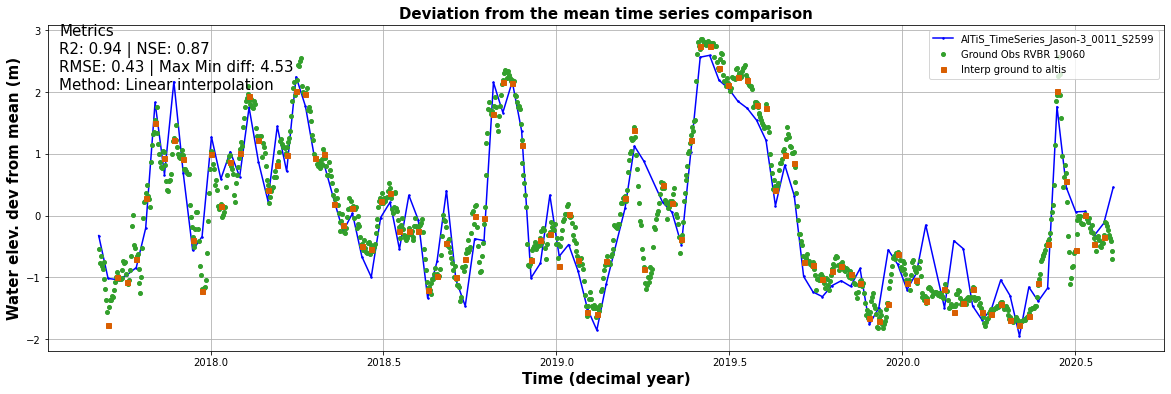

Station America/Maceio ncolgeoid: GEOID_01_MEDIAN 19126 ground_st: True df_altis: (37, 8) df_ground_st: (8133, 9)
dimension ground altis (999, 11) (37, 9)


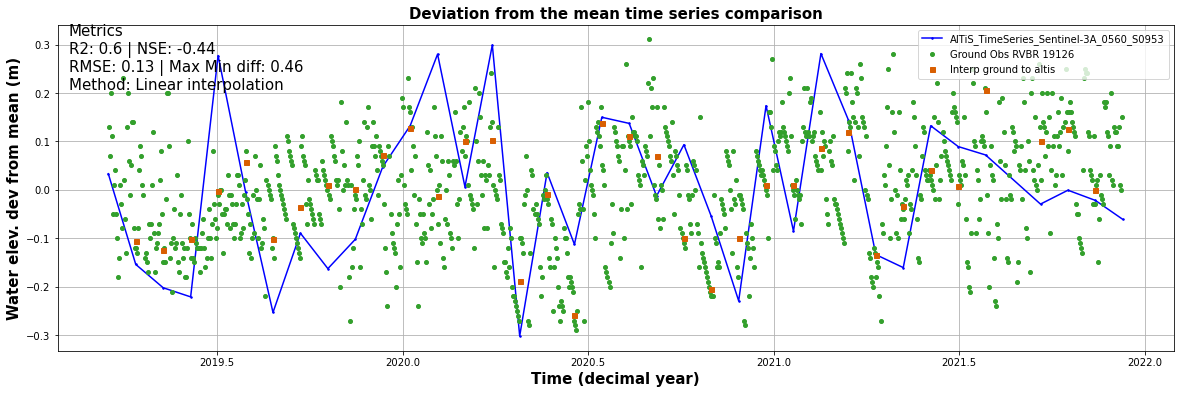

Error: no column geoid_01_median in ../data/alti_timeseries/AlTiS_TimeSeries_Sentinel-3A_0190_S2751.csv
Station America/Sao_Paulo ncolgeoid: GEOID_01_MEDIAN 19069 ground_st: True df_altis: (56, 8) df_ground_st: (8131, 9)
dimension ground altis (1998, 11) (56, 9)


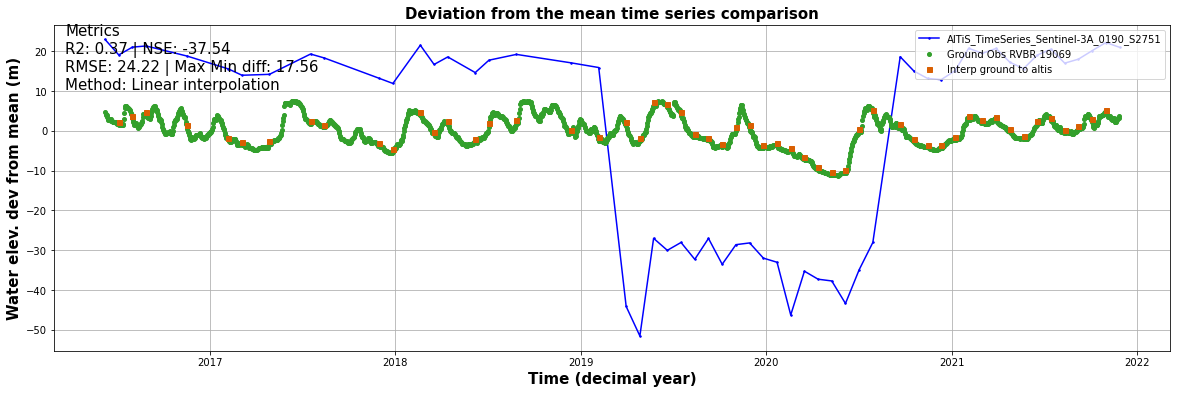

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN 2464800 ground_st: True df_altis: (78, 8) df_ground_st: (7060, 9)
dimension ground altis (2056, 11) (78, 9)


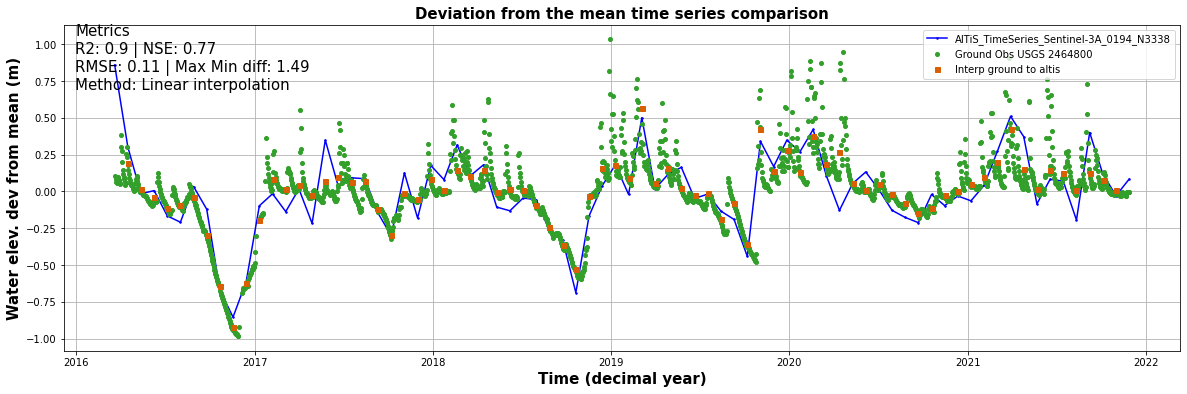

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN 6604000 ground_st: True df_altis: (41, 8) df_ground_st: (7892, 9)
dimension ground altis (1036, 11) (41, 9)


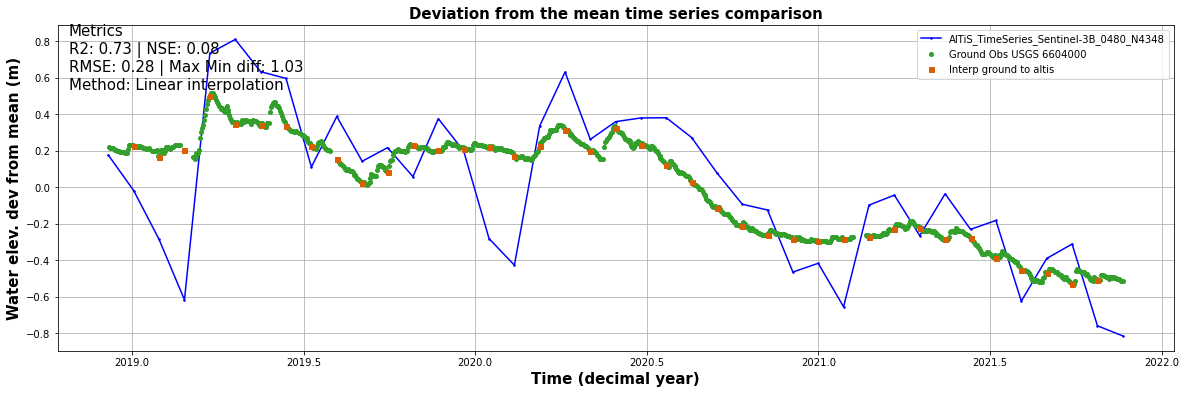

Station America/Chicago ncolgeoid: GEOID_01_MEDIAN 6903880 ground_st: True df_altis: (77, 8) df_ground_st: (7721, 9)
dimension ground altis (2077, 11) (77, 9)


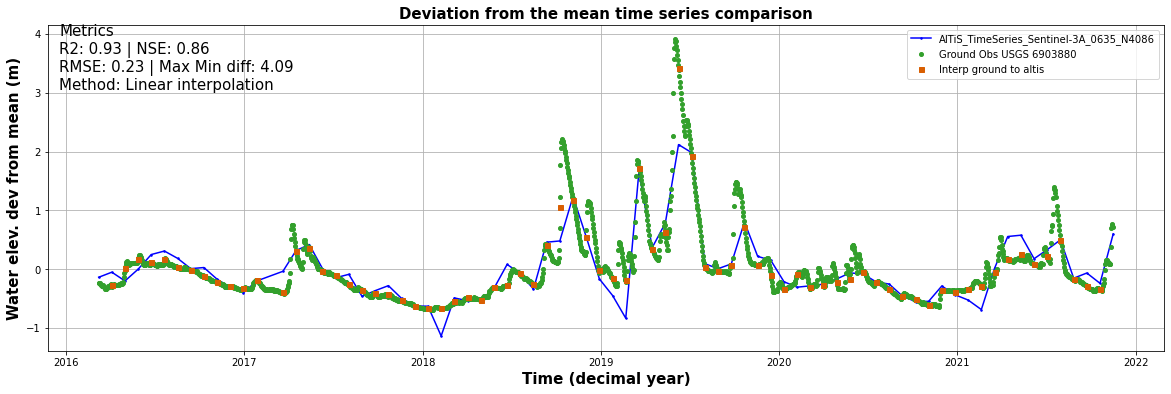

In [9]:
# #Do the linear interpolation to get the accuracies



#Read each file and convert it to dataframe
g_path='../data/alti_timeseries/'
time_fig=datetime.now().strftime("%Y%m%d_%H_%M")
path_name='../data/results/plots_it_'+time_fig+'/'

if save_plot:
    output_f=path_name
else:
    output_f=None

if start==0:
    df_final_altis=pd.DataFrame()
    df_final_ground=pd.DataFrame()
    df_cm=pd.DataFrame()

# #Read shapefile with all the coordinates and the id of the files

path= '../data/alti_timeseries/lonlat_vs_altis_ed.csv'
lon_fd='lon'
lat_fd='lat'
# altis_shp
#altis_shp=gpd.read_file(path)
altis_csv=pd.read_csv(path)
#Add the time_zone to each coordinate 
tf=TimezoneFinder()
# altis_shp['tz']=[tf.timezone_at(lng=row[0], lat=row[1]) for row in altis_shp[[lon_fd, lat_fd]]]


# altis_shp['tz']=altis_shp.apply(lambda x:tf.timezone_at(lng=x[lon_fd],lat=x[lat_fd]), axis=1)
altis_csv['tz']=altis_csv.apply(lambda x:tf.timezone_at(lng=x[lon_fd],lat=x[lat_fd]), axis=1)

#filter only altis time series with ground observations
# altis_w_gts_shp=altis_shp.loc[altis_shp['station_id'].notna()]
altis_w_gts_csv=altis_csv.loc[altis_csv['station_id'].notna()]


#Read each file and convert it to dataframe
g_path='../data/alti_timeseries/'
df_gts=df_ground_ts

st_fd='gauge_id'
st_date_fd='date'
altis_date_fd = 'date'  # Same value for Sentinel-3A/B
altis_height_fd = 'ice1_ku_SurfHeight_alti_median'  # Same value for Sentinel-3A/B
nodataalti=-9999

wse_ref='e'
ncolgeoid='geoid_01_median' #PENDING RAISE AND HANDLE THE EXCEPTION WHEN geoid column not found

    
i=1

for index,row in altis_w_gts_csv.iterrows():
    # print(row['station_id'])
    altis_name=row['altivs_nam']
    st_id=row['station_id']
    ncolgeoid=row['ncolgeoid']
    # Call every altis relative to the ellipsoide
    
    # is_Sentinel=altis_name.find('Sentinel-3')
    # if is_Sentinel!=-1:
    if ncolgeoid!='No':
        #Call the function with geoid field and wse_type='e'
        df_altis, df_ground_st=open_match_station_altis(g_path,altis_name, st_fd, df_gts, st_id,altis_date_fd, altis_height_fd,
                                                        nodataalti,ncolgeoid=ncolgeoid,wse_ref=wse_ref)
    else:
        #Call the function with geoid field and wse_type='g'
        df_altis, df_ground_st=open_match_station_altis(g_path,altis_name, st_fd, df_gts, st_id,altis_date_fd, altis_height_fd, nodataalti)
    
    print('Station '+row['tz']+' ncolgeoid: '+str(ncolgeoid).upper(), st_id+' ground_st: '+str(not df_ground_st.empty)+
          ' df_altis: '+str(df_altis.shape)+' df_ground_st: '+str(df_ground_st.shape))
    if not df_ground_st.empty:
        # print('df_altis\n', df_altis.head(3))
        # print('df_ground_st '+st_id+'\n', df_ground_st.head(3))
        df_altis['ground_st_1']=st_id
        #Convert time in df_gts_st to UTC
        source=df_ground_st['source'].iloc[0]
        #if source !='RVBR':
        #     continue
            
       # df_ground_st['date_utc']=df_ground_st[st_date_fd].dt.tz_localize(row['tz']).dt.tz_convert('utc')
        df_ground_st['date_utc']=[timezone(row['tz']).localize(date).astimezone(utc.zone) for date in df_ground_st[st_date_fd]]
        # Cut the time series to the same period the time series
        (df_altis_c, df_ground_c)=get_common_period(df_ts1=df_altis, df_ts2=df_ground_st, 
                                             date_ts1_fd=altis_date_fd, date_ts2_fd='date_utc', delta_days=False, ndays=0)
       
        #print('\nBefore: '+st_id+'\n', df_ground_st[[st_date_fd,'date_utc','decimal_y']].head())
        #Recalculate date with dates in utc
        if source=='USGS':
            df_ground_c=get_date_time_cols(df_ground_c, 'date_utc', has_hour=False)
        else:
            df_ground_c=get_date_time_cols(df_ground_c, 'date_utc', has_hour=True)
        #print('\nAfter: '+st_id+'\n', df_ground_st[[st_date_fd,'date_utc','decimal_y']].head())
        df_ground_c=df_ground_c.sort_values(by=['decimal_y'])
        df_altis_c=df_altis_c.sort_values(by=['decimal_y'])
        
        df_ground_c['altis_d_1']=altis_name


        (inh_2_altidy, corr_alti_insi, ns_alti_insi, rmse_alti_insi,
         ampl_insi) = interp_ts12ts2_stat(df_ground_c['decimal_y'].to_numpy(), df_ground_c['height'].to_numpy(), 
                                          df_altis_c['decimal_y'].to_numpy(), df_altis_c['height'].to_numpy())
        
        
                #Create a output dataframe with the metrics
        cm_dict={'station':[st_id], 'altis':[altis_name], 'source':[source], 'method':['Linear Interpolation'],
                'r2':[corr_alti_insi],'NSF':[ns_alti_insi],'RMSE':[rmse_alti_insi],'APL':[ampl_insi]}
        df_cmi=pd.DataFrame(cm_dict)
        
        #Concat to final dataframes 
        df_final_altis=pd.concat((df_final_altis, df_altis_c), axis=0)
        df_final_ground=pd.concat((df_final_ground, df_ground_c), axis=0)
        
        df_cm=pd.concat((df_cm,df_cmi), axis=0)
        
        error_m_text='\nR2: '+str(np.round(corr_alti_insi, decimals=2))+' | '+\
        'NSE: '+str(np.round(ns_alti_insi,decimals=2))+'\n'+\
        'RMSE: '+str(np.round(rmse_alti_insi,decimals=2))+' | '+\
        'Max Min diff: '+str(np.round(ampl_insi,decimals=2))+'\n'+\
        'Method: Linear interpolation'
        
        
        labels=altis_name
        labelg='Ground Obs '+source+' '+st_id
        labeli='Interp ground to altis'


        dfs=df_altis_c
        dfg=df_ground_c
        print('dimension ground altis', str(dfg.shape)+' '+str(dfs.shape))
        dic_intp={'decimal_y':df_altis_c['decimal_y'].to_numpy(), 'height':inh_2_altidy}

        dfi=pd.DataFrame(dic_intp)
        date_plot_fd='decimal_y'
        height_plot_fd='height'
        nfig=i
        
        p=plot_dev_mean(nfig,dfs, dfg, dfi, source, st_id, altis_name, date_plot_fd, height_plot_fd, labels, labelg, labeli, error_m_text, output_f)
        p.show()
        p.close()

        i=i+1
        
        
df_final_altis['method']='Linear interp'    
df_final_ground['method']='Linear interp'    



In [14]:
#Save comparison metrics 
df_cm['r2']=[np.round(v, decimals=3) for v in df_cm['r2']]
df_cm['NSF']=[np.round(v, decimals=3) for v in df_cm['NSF']]
df_cm['RMSE']=[np.round(v, decimals=3) for v in df_cm['RMSE']]
df_cm['APL']=[np.round(v, decimals=3) for v in df_cm['APL']]
     
df_cm.to_csv('../data/results/comparison_'+time_fig+'.csv', sep=',')


In [ ]:
#Plot methods comparison metrics
import seaborn as sns
import matplotlib as plt

sns.set_style('white')
sns.set_context('poster', font_scale=1.5)

df=df_cm.copy()
x_fd=

In [ ]:
# #read all altiss 


# import geoplot as gplt
# #WRITE AS FUNCTIONS TO MOVE LATER
# #Read shapefile with all the coordinates and the id of the files
#path= '/home/angelica/Dropbox/Research/LOCSS/Denis_Sylvain/15_L_Altis_20220318/lonlat_vs_altis_ed.shp' When it is a shape file
path= '../data/alti_timeseries/lonlat_vs_altis_ed.csv'
lon_fd='lon'
lat_fd='lat'
# altis_shp
#altis_shp=gpd.read_file(path)
altis_csv=pd.read_csv(path)
#Add the time_zone to each coordinate 
tf=TimezoneFinder()
# altis_shp['tz']=[tf.timezone_at(lng=row[0], lat=row[1]) for row in altis_shp[[lon_fd, lat_fd]]]


# altis_shp['tz']=altis_shp.apply(lambda x:tf.timezone_at(lng=x[lon_fd],lat=x[lat_fd]), axis=1)
altis_csv['tz']=altis_csv.apply(lambda x:tf.timezone_at(lng=x[lon_fd],lat=x[lat_fd]), axis=1)

#filter only altis time series with ground observations
# altis_w_gts_shp=altis_shp.loc[altis_shp['station_id'].notna()]
altis_w_gts_csv=altis_csv.loc[altis_csv['station_id'].notna()]
# print(altis_shp.shape)
# print(altis_w_gts_shp.shape)
# print(altis_w_gts_shp.columns)
# print(altis_csv.shape)
# print(altis_w_gts_csv.shape)
# print(altis_w_gts_csv.columns)

#Read each file and convert it to dataframe
g_path='../data/alti_timeseries/'
df_gts=df_ground_ts

st_fd='gauge_id'
st_date_fd='date'
altis_date_fd = 'date'  # Same value for Sentinel-3A/B
altis_height_fd = 'ice1_ku_SurfHeight_alti_median'  # Same value for Sentinel-3A/B
nodataalti=-9999
i=1
df_final_altis=pd.DataFrame()
df_final_ground=pd.DataFrame()

for index,row in altis_w_gts_csv.iterrows():
    # print(row['station_id'])
    altis_name=row['altivs_nam']
    st_id=row['station_id']
    
    df_altis, df_ground_st=open_match_station_altis(g_path,altis_name, st_fd, df_gts, st_id,altis_date_fd, altis_height_fd, nodataalti)
    
    if not df_ground_st.empty:
        # print('df_altis\n', df_altis.head(3))
        # print('df_ground_st '+st_id+'\n', df_ground_st.head(3))
        df_altis['ground_st_1']=st_id
        source=df_ground_st['source'].iloc[0]
        if source=='RVBR':
            continue
        #Convert time in df_gts_st to UTC
        
        df_ground_st['date_utc']=df_ground_st[st_date_fd].dt.tz_localize(row['tz']).dt.tz_convert('utc')
        #print(df_ground_st.head(), st_id)
        
        #print('\nBefore: '+st_id+'\n', df_ground_st[[st_date_fd,'date_utc','decimal_y']].head())
        if source=='USGS':
            df_ground_st=get_date_time_cols(df_ground_st, st_date_fd, has_hour=False)
        else:
            df_ground_st=get_date_time_cols(df_ground_st, st_date_fd, has_hour=True)
        #print('\nAfter: '+st_id+'\n', df_ground_st[[st_date_fd,'date_utc','decimal_y']].head())
        df_ground_st=df_ground_st.sort_values(by=['decimal_y'])
        df_ground_st['altis_d_1']=altis_name

        #Concat to final dataframes 
        df_final_altis=pd.concat((df_final_altis, df_altis), axis=0)
        df_final_ground=pd.concat((df_final_ground, df_ground_st), axis=0)

        #Get the max and mins
        altis_min=df_altis['decimal_y'].min()
        ground_min=df_ground_st['decimal_y'].min()
        altis_max=df_altis['decimal_y'].max()
        ground_max=df_ground_st['decimal_y'].max()
        # print('\nAltis_min Ground_min: ',[altis_min, ground_min])
        # print('\nAltis_max Ground_max: ',[altis_max, ground_max])
        #print('\nAltis_min Ground_min: ',[altis_min, ground_min])
        if altis_min>ground_min:
            df_ground_plot=df_ground_st.loc[(df_ground_st['decimal_y']>=altis_min)]#&(df_ground_st['decimal_y']<altis_max)]
            df_altis_plot=df_altis
        else:
            df_ground_plot=df_ground_st
            df_altis_plot=df_altis.loc[(df_altis['decimal_y']>=ground_min)]#&(df_ground_st['decimal_y']<altis_max)]


        (inh_2_altidy, corr_alti_insi, ns_alti_insi, rmse_alti_insi,
         ampl_insi) = interp_ts12ts2_stat(df_ground_plot['decimal_y'].to_numpy(), df_ground_plot['height'].to_numpy(), 
                                          df_altis_plot['decimal_y'].to_numpy(), df_altis_plot['height'].to_numpy())

        error_m_text='\nR2: '+str(np.round(corr_alti_insi, decimals=2))+' | '+\
        'NSE: '+str(np.round(ns_alti_insi,decimals=2))+'\n'+\
        'RMSE: '+str(np.round(rmse_alti_insi,decimals=2))+' | '+\
        'Max Min diff: '+str(np.round(ampl_insi,decimals=2))+'\n'



        plt.figure(i, figsize=(20, 6))
        gplot=plt.plot(df_ground_plot['decimal_y'], 
                       df_ground_plot['height'], '-go', markersize=1.5, label='Ground Obs '+st_id)
        iplot=plt.plot(df_altis_plot['decimal_y'].to_numpy(), 
                        inh_2_altidy, '--ks', markersize=3, label='Interp ground to altis')
        #plt.plot(altidy, altiwelev, '-ro', markersize=2.5)
        plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
        plt.xlabel('Time (decimal year)', size=15, weight='bold')
        plt.ylabel('Water elevation (m)', size=15, weight='bold')
        plt.grid('on')
        plt.legend()
        plt.title('Water elevation (m)', size=15,
                  weight='bold')
        plt.savefig('../data/plots/'+source+'_ground_interp_'+st_id+'_vs_'+altis_name+'.png',
                     bbox_inches='tight')
        i=i+1
        
        
    
    #['gauge_id','source'
    
# def open_match__plot_station_altis(g_path,altis_name, st_id, df_gts, altis_date_fd, altis_height_fd, nodataalti=-9999):


In [134]:
df_altis_plot

decimal_y      height  year  month  day  hour  \
0   2016.183479  275.212348  2016      3    8     3   
1   2016.257250  275.298792  2016      4    4     3   
2   2016.331020  275.150594  2016      5    1     3   
3   2016.404791  275.351242  2016      5   28     3   
4   2016.478561  275.598305  2016      6   24     3   
..          ...         ...   ...    ...  ...   ...   
72  2021.578505  275.578580  2021      7   31     3   
73  2021.652477  274.932534  2021      8   27     3   
74  2021.726450  274.997760  2021      9   23     3   
75  2021.800422  274.833224  2021     10   20     3   
76  2021.874395  275.673569  2021     11   16     3   

                                 name_altis ground_st_1  
0   AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
1   AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
2   AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
3   AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
4   AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
..                                      ...         ...  
72  AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
73  AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
74  AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
75  AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  
76  AlTiS_TimeSeries_Sentinel-3A_0635_N4086     6903880  

[77 rows x 8 columns]

In [48]:
df1=go.read_ground_data('LOCSS', station_id=lc_lakes)
# df.shape
# df_locss_filtered=df.loc[df['gauge_id'].isin(lc_lakes)]
# df_locss_filtered.shape
x=df1['gauge_id'].unique()
for a in x:
    print(df1.loc[df1['gauge_id']==a].shape)

(536, 24)
(53, 24)
(170, 24)
(256, 24)
(109, 24)
(393, 24)


In [13]:
df_arhn.head(3)

date  height source gauge_id  year  month  day  hour  \
0 2010-03-01 12:00:00    2.30   ARHN     2830  2010      3    1    12   
1 2010-03-02 12:00:00    2.30   ARHN     2830  2010      3    2    12   
2 2010-03-03 13:00:00    2.31   ARHN     2830  2010      3    3    12   

     decimal_y  
0  2010.163014  
1  2010.165753  
2  2010.168493

In [14]:
df_usgs.head(3)

Unnamed: 0 agency_cd gauge_id       date  height X_00065_00003_cd source  \
0           1      USGS  2464800 2002-07-04  223.73                A   USGS   
1           2      USGS  2464800 2002-07-05  223.66                A   USGS   
2           3      USGS  2464800 2002-07-06  223.61                A   USGS   

   year  month  day  hour    decimal_y  
0  2002      7    4    12  2002.505479  
1  2002      7    5    12  2002.508219  
2  2002      7    6    12  2002.510959